## Seaborn: Statistical Data Visualizations

(Distribution Plots)
- Distribution Plots
- Categorical Plots
- Axis grids
- Matrix Plots
- Regression Plots

### Distribution Plots

Distribution Plots: Visualizing the distribution of a dataset.

get a sense for how the variables are distributed.


These distribution plots
- includes:
- distplot()
- jointplot()
- pairplot()
- rugplot()
- kdeplot()

 seaborn comes with built-in data sets, which can be loaded by calling built-in function load_dataset(‘data_set_name’)
 
 The given list of built-in data sets can be obtained using "sns.get_dataset_names()"

In [1]:
# import seaborn library
import seaborn as sns
%matplotlib inline

# set the display format in matplotlib, If you are using retina display 

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina'

In [2]:
# list of datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# load dataset 'tips'
data_tips = sns.load_dataset('tips')
data_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
# overview the dataset
# Check the type of dataset
type(data_tips) # pandas.core.frame.DataFrame

# Lets get a concise summary of the data set.Enteries num, col num, datatypes
data_tips.info() # 244 entries and 7 columns

# Get some first rows
data_tips.head()

# exp: total_bill along with the amount of tip that a customer left for the staff along

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


To take a quick look at a univariate (single variable) distribution in seaborn use the distplot() function
This will draw a histogram and fit a kernel density estimate (KDE)

Remove the KDE layer and display the histogram only
using kde=False

A Good thing to remember for histograms: Always select a balanced number for bin size, very high value may
plot every single instance

using histplot() instead of displot()
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='tip', ylabel='Count'>

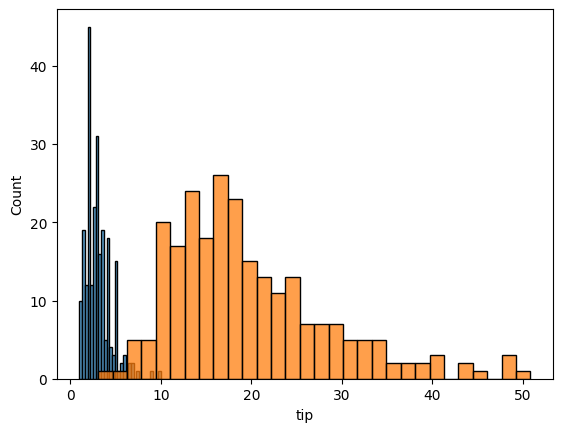

In [5]:
# lets check how the total bill are distributed in the data set
#sns.displot(data_tips['total_bill'])

# We can add 'tip' distribution on the same plot as well!
#sns.displot(data_tips['tip'])

# set bin size
#sns.displot(data_tips['total_bill'], kde = False, bins=30)


# If you want to display tip col as well
#sns.distplot(data_tips['tip'],kde=False,bins=30) # try yourself
sns.histplot(data_tips['tip'],kde=False,bins=30)
sns.histplot(data_tips["total_bill"], kde=False,bins=30)

#data suggests that most of the bills are between 10 and 20 dollars!



Seaborn provides a convenient way of plotting bivariate (two variables) data using jointplot().

For example, doing some comparison of how much the customer gave in tip based of their total bill. 

The function basically match up two distribution plots with our choice of what kind (scatter by default) parameter to compare with: * kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }

We need to pass in the dataset (tips) and tell the function what variables (columns) we want to plot to compare and what is the kind parameter.

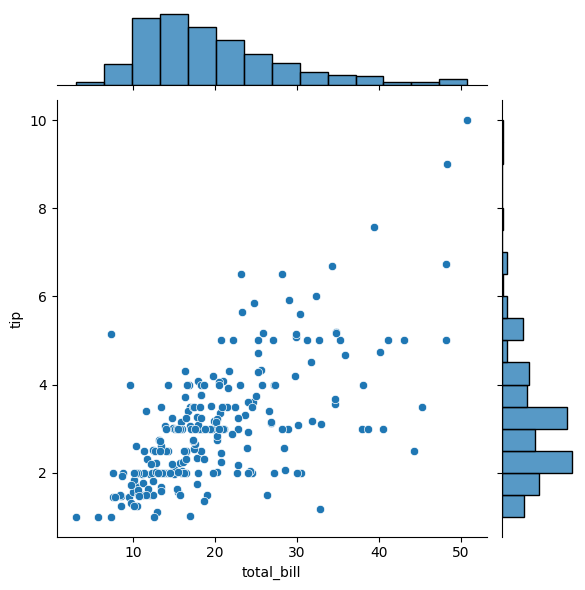

In [6]:
# PLot comparision of customer tips with their total bill
sns.jointplot(x = 'total_bill', y= 'tip', data = data_tips) #kind='scatter' - default

From the plot we can see:
- The most of the tips are less than 4 dollars. The maximum in tip is around 10 dollars.
- There is trend in the tips with total_bill as well.
- More the customer pay in bill, more he/she gave in the tip.

Exploring more details by playing with paramaters

- Kind = 'hex' Let’s pass hex to kind - hexagon distribution (very useful plot when you have several data points that are overlapping), More the data points in a hexagon are, darker it will be in color

- Kind = 'reg' reg is for regression. With kind = 'reg', the plot is like a scatter plot with a regression line drawn by seaborn. linear fit to the scattered data points and has pearson coefficient and p-value

- kind = ‘kde’ This will give 2D kde plot, showing the darker region with density where most of the data points match up. 

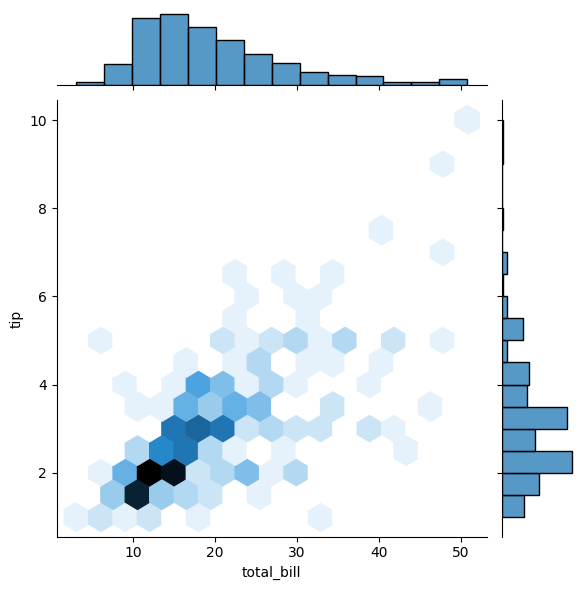

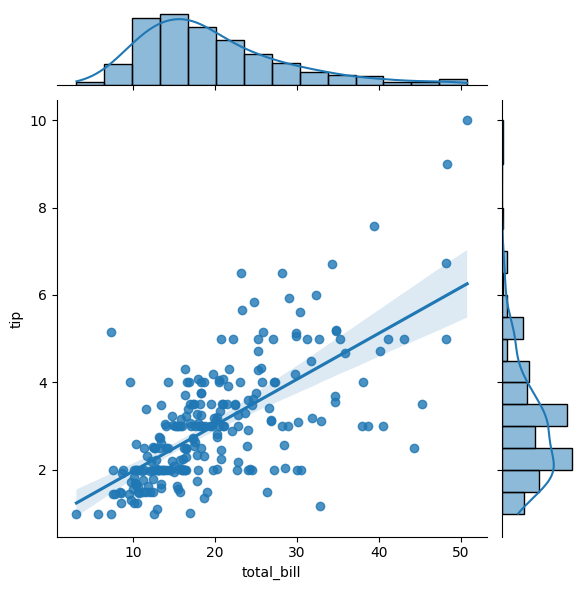

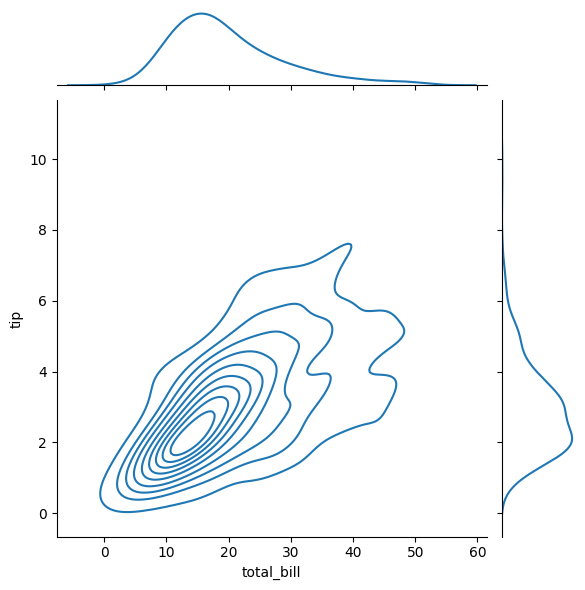

In [7]:
# Hexagon plot
sns.jointplot(x='total_bill', y='tip',kind='hex',data = data_tips)

# Regression plot
sns.jointplot(x='total_bill',y='tip',kind='reg', data = data_tips)

# 2D kde plot
sns.jointplot(x='total_bill',y = 'tip', kind = 'kde', data=data_tips)

Seaborn function pairplot()
Have a quick look on our entire data to see the pairwise relationship which puts multiple pairwise bivariate distributions in a dataset together on a single canvas

For the larger dataframes, it takes longer time to plot the pairplot

Along with plotting pairwise relationships across an entire dataframe (for the numerical columns), pairplot() supports a color hue argument (for categorical columns) as well. 

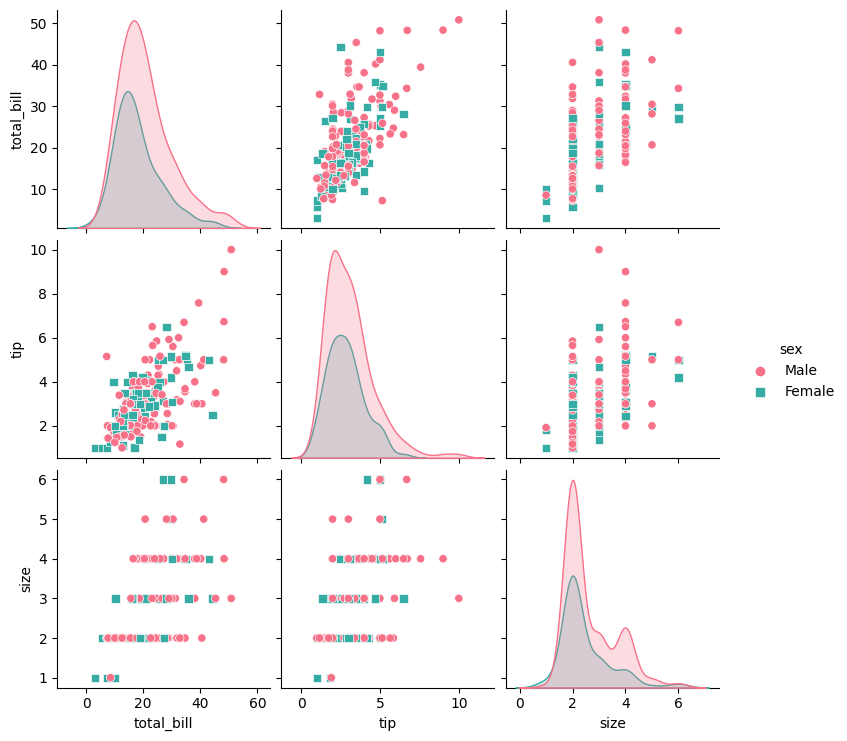

In [8]:
# see the pairwise relationship of dataset
#sns.pairplot(data_tips)
##sns.pairplot(data_tips, hue='sex') #hue = categorical variable name



#try passing palette along with different options. Use other set of colors from seaborn website as well!
##sns.pairplot(data_tips, hue='sex',palette='coolwarm')
##sns.pairplot(data_tips, hue='sex',palette='husl')
sns.pairplot(data_tips, hue='sex',palette='husl', markers=['o', 's'])

rugplot() is a very simple concept and just plot sticks on an axis for every data point on a univariate distribution. They are the building block of a KDE plot that we have seen in out earlier plots.

What the rugplot() is doing, it is drawing a line/stick for every single point in the passed data column.

So, the difference between distplot()(histogram) and rugplot() is that the histogram essentially has bins and it counts how many sticks/lines are in that bin and then show it as a number up along the y axis

the number of all the sticks/lines in rugplot are stacked on each other in distplot for the respective bin. More lines in the rugplot higher bin in distplot, Less lines in rugplot smaller bin in distplot.

<Axes: xlabel='total_bill', ylabel='Count'>

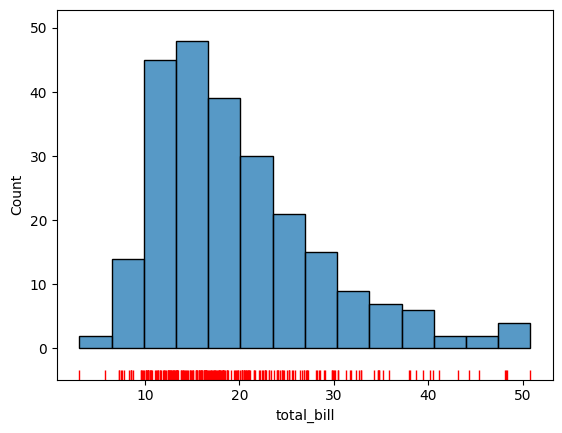

In [9]:
# Let's pass a single col total_bill to the rugplot
##sns.rugplot(data_tips['total_bill'])

# comparing rugplot() and distplot()

sns.rugplot(data_tips['total_bill'], color='r') # rugplot
#sns.distplot(data_tips['total_bill'], kde=False) # distplot
sns.histplot(data_tips['total_bill'], kde=False) # hisplot

kdeplot()

KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. (we are going to create a kde plot from scratch in a while, stay tuned!). 

Let’s put kdeplot, rugplot and distplot for total_bils and tips on a single canvas first!

<Axes: xlabel='total_bill', ylabel='Density'>

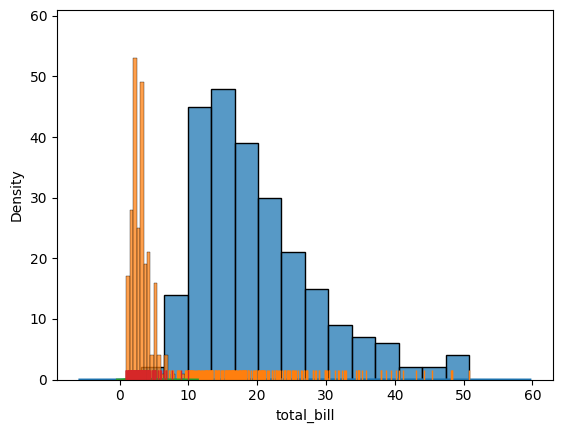

In [10]:
sns.kdeplot(data_tips['total_bill'])
sns.rugplot(data_tips['total_bill'])
#sns.distplot(data_tips['total_bill']) # it shows the line graph
sns.histplot(data_tips['total_bill'])


sns.kdeplot(data_tips['tip'])
sns.rugplot(data_tips['tip'])
#sns.distplot(data_tips['tip'])
sns.histplot(data_tips['tip'])

### Kernel Density Estimation plots - kdeplot

Let’s try to understand kde plots using rugplot. How do we actually build kde line based on rugplot?
The figure below (source) beautifully explains the process



Comparing histogram with KDE,
Each bar in rugplot, has its own kernels (normal Gqussian distribution), then the kernel density estimate is the sum of individual kernels

KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that
value.


Let’s create a diagram to capture the concept of kde



(0.0, 1.0)

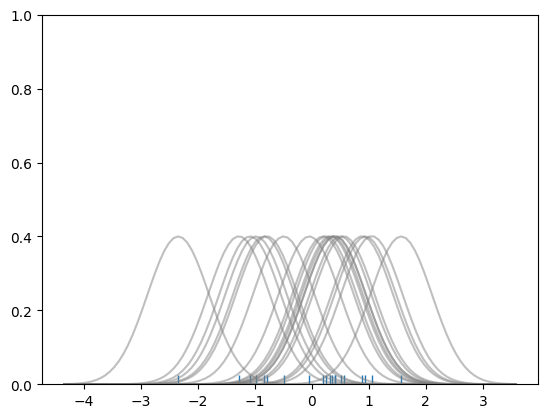

In [11]:
# Step 1: Importing couple of libraries to use
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Creating dataset to use
# setting seed to generate same random numbers everytime you run the code, if you use different
# number in seed(), you may get different kde plot at the end. TRY CHANGING THE NUMBER IN SEED!
np.random.seed(20) #101

# data is the dataset from random.randn (recall numpy here!)
ds = np.random.randn(20)

# Creating rugplot using dataset
sns.rugplot(ds);

# Setting up the x-axis for the plot using max and min values in the dataset
x_min = ds.min() - 2
x_max = ds.max() + 2

# creating 100 equally spaced points from x_min to x_max using np.linspace()
x_axis = np.linspace(x_min,x_max,100)

# Setting up the bandwidth, follow the wikipedia link for more information: url = 'http://en.wikipedia.org/wiki/ Kernel_density_estimation#Practical_estimation_of_the_bandwidth'
bandwidth = ((4*ds.std()**5)/(3*len(ds)))**.2

# Creating an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in ds:
# Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) #shift+tab if you want to know more about the function!
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)
plt.ylim(0,1)

In the plot above, we have rugplot (line for each data point) and kernels for each line in the rugplot!

This is how we create the kde plots

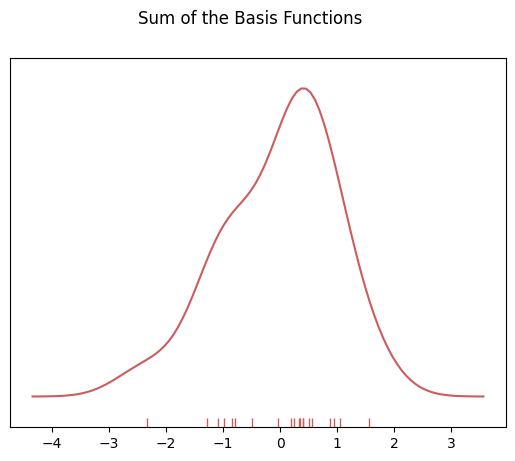

In [12]:
# We need to sum the basis functions to get the kde plot.
# Plotting the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)

# Plotting figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adding the initial rugplot
sns.rugplot(ds,c = 'indianred')

# Getting rid of y-tick marks
plt.yticks([])

# Setting title
plt.suptitle("Sum of the Basis Functions");

### Categorical Plots

Categorical scatterplots: Show each observation at each level of the categorical variable.
- stripplot(), provides a simple way to show the values of some quantitative variable across the level of a categorical variable. It draws a scatterplot where one variable is categorical.
A parameter jitter is useful and provides easy solution to this overlap issue by adjusting the position of datapoitns along categorical axis, so that it is easier to see the distribution.
We can specify the amount of jitter (such as, half the width of the uniform random variable support), or just use Truefor a good default

- swarmplot(), same as stripp(), uses different approach to avoid the overlapping issue in the datapoints by positioning each scatterplot point on the categorical axis with an algorithm that avoids overlapping point.
the swarmplot() does not scale well to large numbers of observations.
we don’t need jitter anymore in swarmplot()

put the categorical variable on the vertical axis when the names are long or there are many categories

Categorical distribution plots: Show an abstract representation of each distribution of observations (categorical data).
- boxplot(), (box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

The box shows the quartile
the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In statistics, the quartiles of a ranked set of data values are the three points that divide the dataset into four equal groups, each group comprising a quarter of the data. A quartile is a type of quantile. 
    - The first quartile (Q1) is defined as the middle number between the smallest number and the median of the data set. 
    - The second quartile (Q2) is the median of the data.
    - The third quartile (Q3) is the middle value between the median and the highest value of the data set

- violinplot(), draw a combination of boxplot and kernel density estimate.

we have a box plot on top of the violinplot. Unlikely the box plot, violin plot allows us to actually plot all the components that correspond to actual data points. Violin plot is essentially showing kernel density estimation of the underlying distribution.

They give a lot more information as far as the distribution of all the points themselves is concerned, but at the cost of more time looking and understanding the violin plot. 

It also has  hue parameter.

it’s very convenient to use split = True. Rather than set of violins plots, next to each other for a nested categorical variable, this will draw half of a violin for each level that can make it easier to directly compare the distributions in nested categorical variable, e.g. sex, smoker in this case.

- boxenplot(),  draw an enhanced box plot for larger datasets. This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

We can pass hue parameter along with our own choice of palette as well!


Categorical estimate plots: Apply a statistical estimation to show a measure of central tendency and confidence interval.

Often, rather than showing the distribution within each category, you might want to show the central tendency of the values.

- barplot(), allows us to aggregate the categorical data based on some function, by default the mean.

Measures of central tendency are often called averages. The most common measures of central tendency are arithmetic mean, median and mode.


- countplot(), show the number of observations in each category rather than computing a statistic for a second variable, such as mean, standard deviation etc. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot().
the same as barplot except the estimator is explicitly counting the number of occurrences

- pointplot(), An alternative style for visualizing the same information, as of using bar plot, is offered by the pointplot() function. Rather than showing a full bar (using barplot) it just plots the point estimate and confidence interval

pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because our eyes are quite good at picking up on differences of slopes


Drawing multi-panel categorical plots:

catplot() (previously known as factorplot) the most general form of a categorical plot. It can take in
a kind parameter to adjust the plot type



Using plots depends on the audiance, so important note is understand your audience!

- If you are dealing with more technical people, like data scientists etc, they may have used violin plots and this is a great choice to use while presenting the data.

- If you are dealing with more executive people like, CEO or investors, you better use the box plot, which is the more popular and commonly used for data interpretation


Only use violin plot if you find something very interesting using this type of the plot

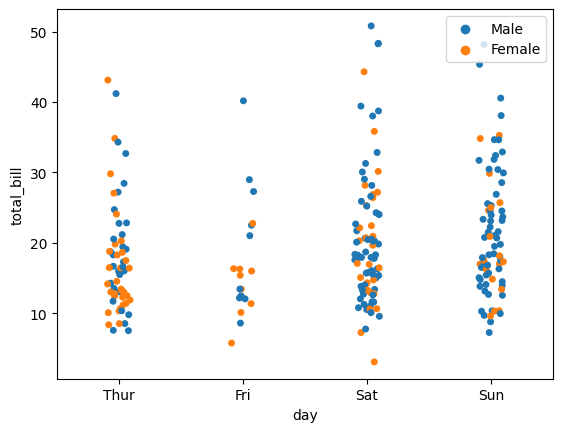

In [13]:
# example for plots for data_tips
# stripplot()

##sns.stripplot(x = 'day', y = 'total_bill', data = data_tips)

# create object 'axes' as 'ax'
ax = sns.stripplot(x = 'day', y = 'total_bill', data = data_tips, jitter = True, hue='sex') # palette = 'collwarm'

# reposition the legend
ax.legend(loc='upper right');

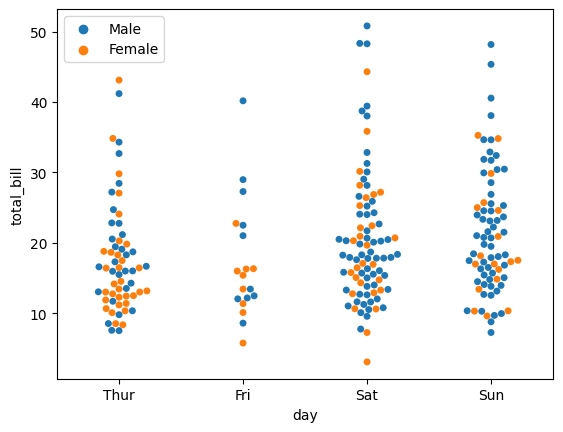

In [14]:
# swarmplot()
ax = sns.swarmplot(x= 'day', y = 'total_bill', data = data_tips, hue='sex') #,palette='coolwarm'

ax.legend(loc=2); # we can pass loc [1,2,3,4] as well!

<Axes: xlabel='total_bill', ylabel='day'>

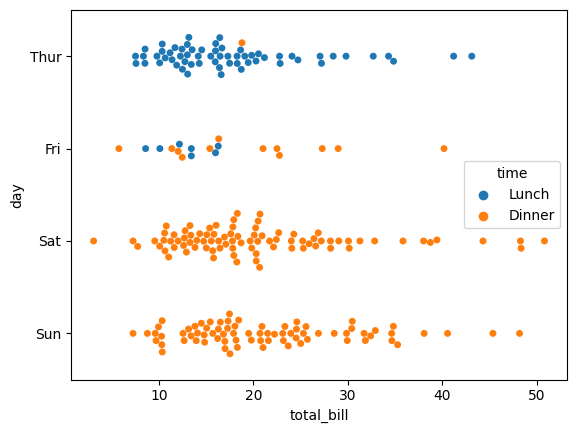

In [15]:
sns.swarmplot(x = 'total_bill', y = 'day', data = data_tips, hue= 'time')

We can observe from the plot above: * almost all the customers come for lunch on Thursday * almost all the customers come for dinner on the weekends

On Fridays, not many go out for lunch or dinner, they may want to save money and energy for the weekends!

<Axes: xlabel='day', ylabel='total_bill'>

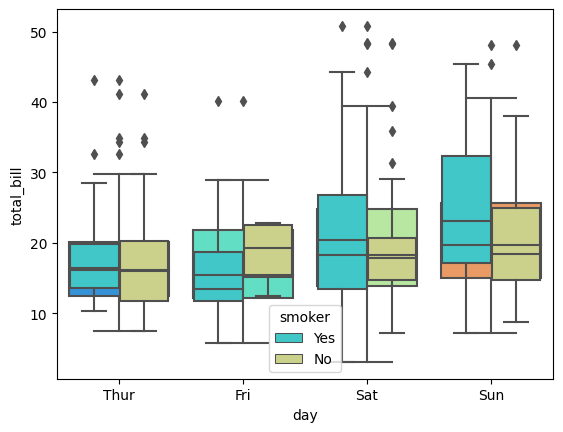

In [16]:
# boxplot()
sns.boxplot(x='day', y='total_bill', data = data_tips, palette = 'rainbow') # palette = 'rainbow'

# showing hue on box plot for smoker and sex variables
##sns.boxplot(x='day', y='total_bill', data = data_tips, palette = 'rainbow', hue='sex')
sns.boxplot(x='day', y='total_bill', data = data_tips, palette = 'rainbow', hue='smoker')

About the above box plot:
- the categorical variable is along X
- each data at any box is divided in four quartile groups:
Q1:between the bottom whisker and the bottom of the box 
Q2:between the bottom of the box to the line in the box (median)
Q3:between the median and the upper end of the box
Q4:between upper end of the box and the upper whisker

Points outside the quartiles are outliers

In the plot above, we split the data into two boxes for each day based on their sex or smoking habit in different colors. Now we can compare daily behavior of the person along with other category sex or smoking


This is a true power of seaborn which quickly allow us to add another layer using hue parameter and provide in-depth information from our data very quickly and smoothly


<Axes: xlabel='day', ylabel='total_bill'>

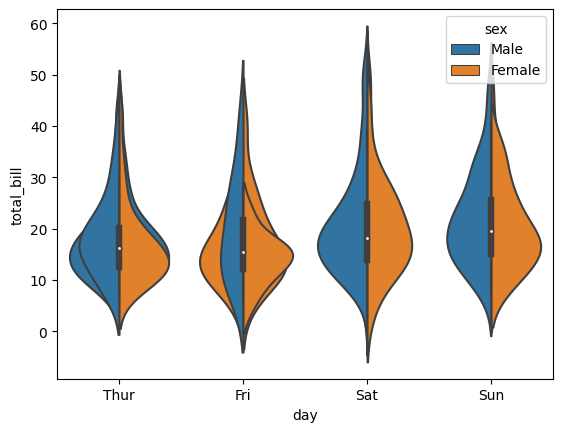

In [17]:
# violinplot()
sns.violinplot(x = 'day', y ='total_bill', data = data_tips);

sns.violinplot(x = 'day', y ='total_bill', data = data_tips, hue='sex', split=True)

In the plot above, the blue and green distributions are splitted in half of the each violin for male and female. Now we can directly compare the distributions the nested categorical variable sex for male and female.

<Axes: xlabel='total_bill'>

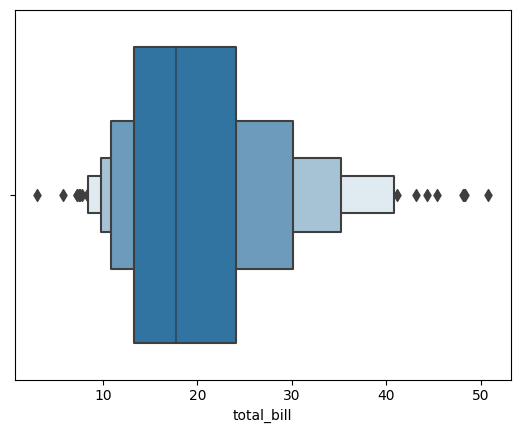

In [18]:
# boxenplot()
sns.boxenplot(x=data_tips['total_bill'])

Compare the above plot with the distplot from the previous lecture. Bigger the bar is, bigger the box in boxenplot is! Let’s try one more using two variables, “day” and “total_bill”.

<Axes: xlabel='day', ylabel='total_bill'>

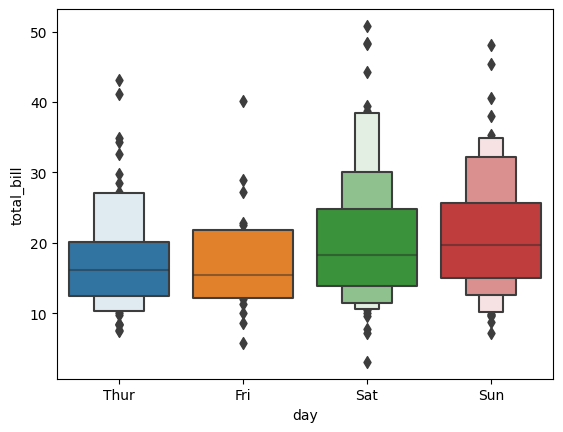

In [19]:
sns.boxenplot(x="day", y="total_bill", data=data_tips)

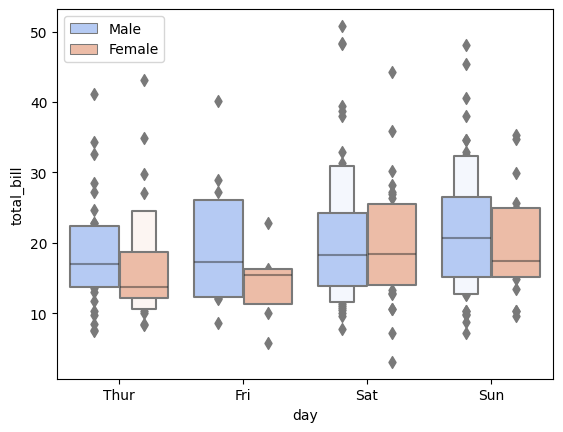

In [20]:
ax = sns.boxenplot(x="day", y="total_bill", hue="sex", data=data_tips, palette="coolwarm")
ax.legend(loc="upper left")

<Axes: xlabel='day', ylabel='total_bill'>

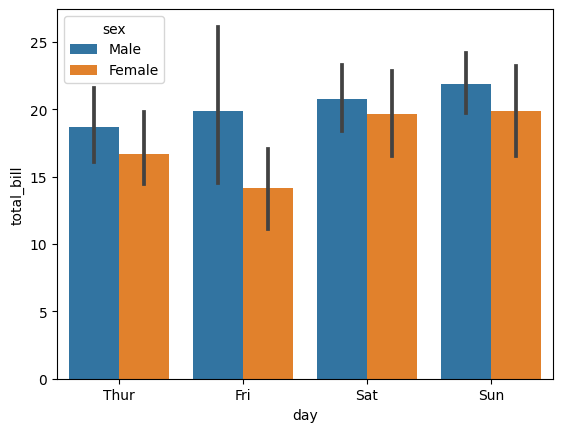

In [21]:
# barplot()
#sns.barplot(x='sex', y='total_bill',data=data_tips)
sns.barplot(x="day", y="total_bill", hue="sex",data=data_tips)

In the plot above, along y, we get mean of the “total_bill” paid by male in blue bar and by female in orange bar.
If we want to use standard deviation as our estimator for gender on each day of week, we use numpy.std 

<Axes: xlabel='sex', ylabel='total_bill'>

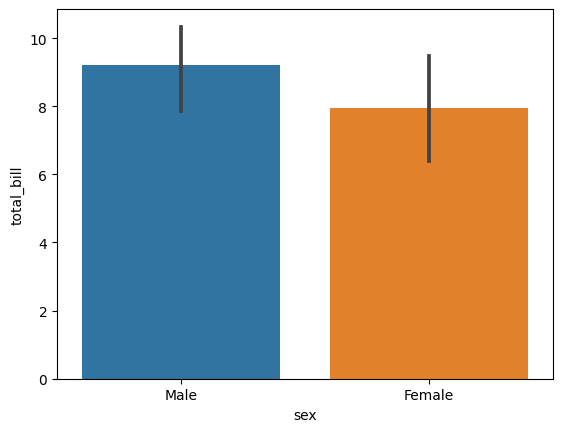

In [22]:
import numpy as np # need to use for np.std
sns.barplot(x='sex', y='total_bill', data=data_tips, estimator=np.std)
#sns.barplot(x="day", y="total_bill", data=data_tips, hue="sex",estimator=np.std)

<Axes: xlabel='day', ylabel='count'>

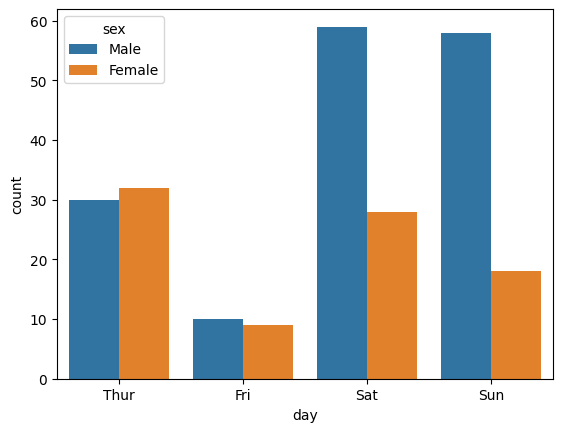

In [23]:
# countplot()
sns.countplot(x="day", hue="sex",data=data_tips)

In the plot above, no of observations in nested category “sex” on each day of the week is along “y”.

<Axes: xlabel='size', ylabel='count'>

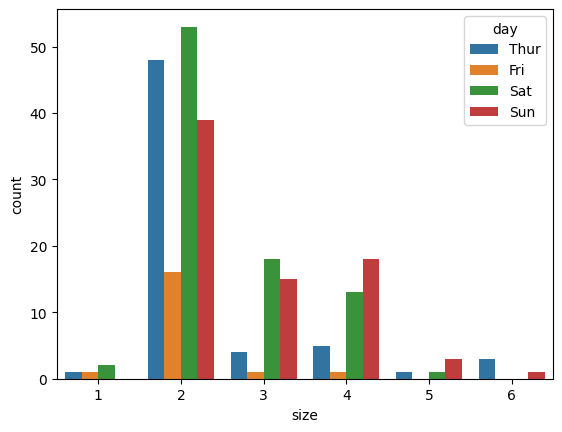

In [24]:
# another example using size of the group in the data
##sns.countplot(x="size",data=data_tips)

# group of 2 is the most common!
sns.countplot(x='size',hue='day',data=data_tips) # try this line of code

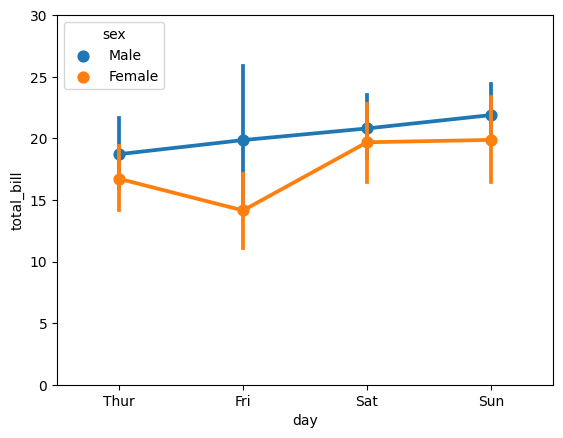

In [25]:
# pointplot()
sns.pointplot(x="day", y="total_bill", hue="sex",data=data_tips)
# Let's rescale y to compare in the next figure, we can use matplotlib options in seaborn!
import matplotlib.pyplot as plt
plt.ylim(0,30);

#### Combining graphs

It’s very helpful to combine them on a single canvas to get in-sights from your data. this also allows direct comparisons. 

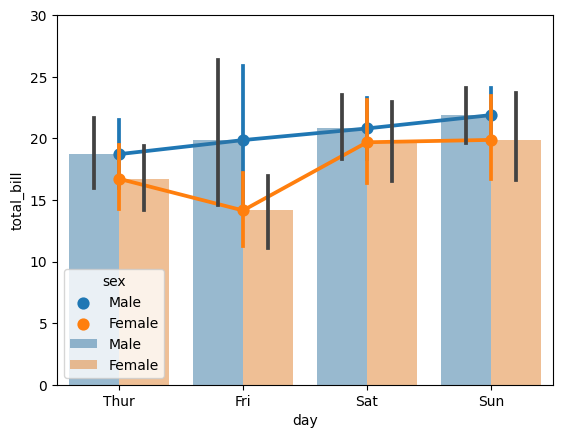

In [26]:
# Let's put barplot on top of pointplot to compare
sns.pointplot(x="day", y="total_bill", hue="sex",data=data_tips)
sns.barplot(x="day", y="total_bill", hue="sex",data=data_tips, alpha=0.5)

# again matplotlib option "plt.ylim()". remember seaborn is on top on matplotlib!
plt.ylim(0,30);

<Axes: xlabel='day', ylabel='tip'>

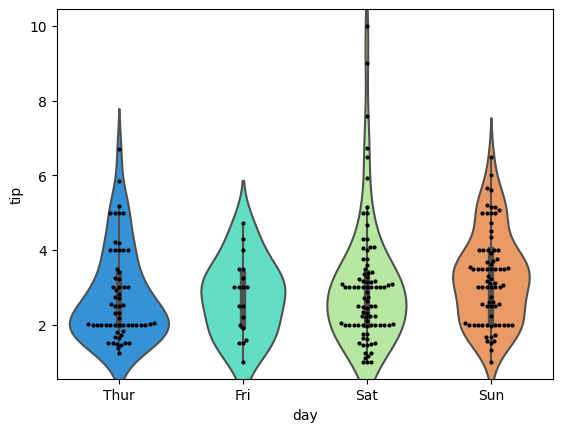

In [27]:
# combining violinplot and swarmplot
# How much in tip on each day
sns.violinplot(x="day", y="tip", data=data_tips, palette="rainbow")
sns.swarmplot(x="day", y="tip", data=data_tips, color="black",size=3)

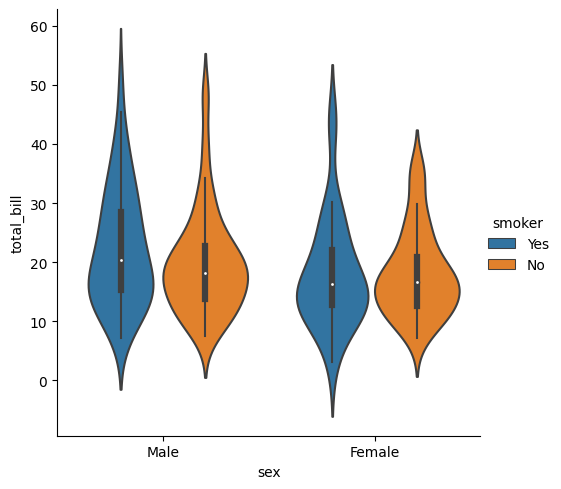

In [28]:
#catplot()
#sns.factorplot(x="sex",y="total_bill",data=tips,hue='smoker',kind="box")
sns.catplot(x="sex",y="total_bill",data=data_tips, hue="smoker",kind="violin")
# change the kind to violin, bar etc

The main advantage of using a catplot() is that it is very easy to “facet” the plot and investigate the role
of other categorical variables. 

We can use col = time to plot all the nested categorical values in time side-y-side

try kind = "box" and col = day to plot all the nested categorical values in time side-y-side

pass in the size and aspect parameters as well

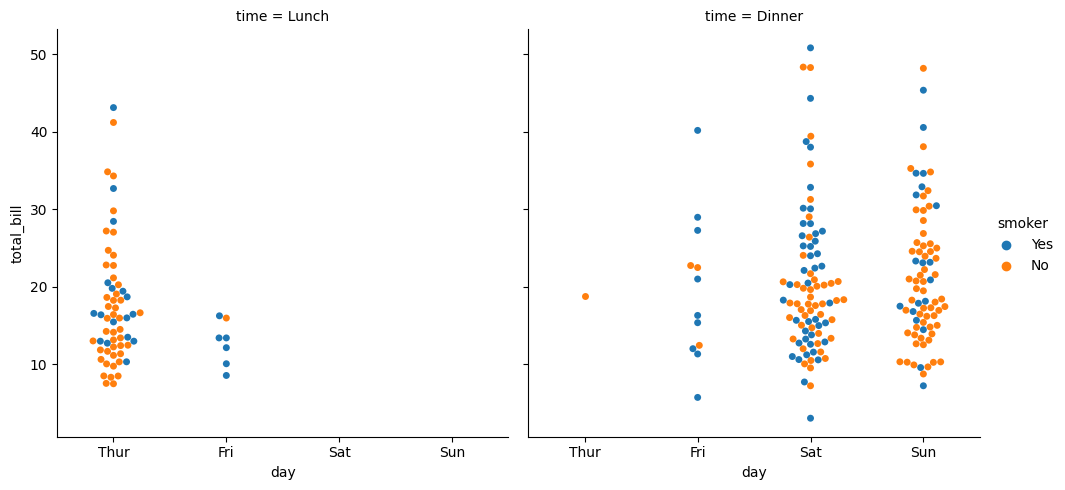

In [29]:
#sns.factorplot(x="day", y="total_bill", hue="smoker", col="time", data=data_tips,kind="swarm")
sns.catplot(x="day", y="total_bill", hue="smoker", col="time", data=data_tips,kind="swarm")

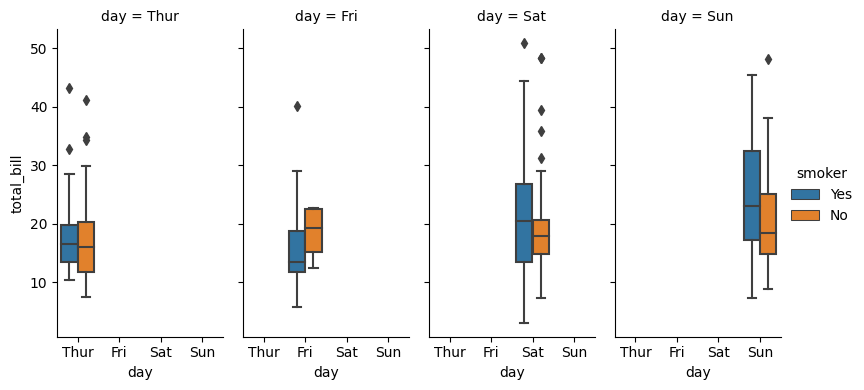

In [30]:
#sns.factorplot(x="day", y="total_bill", hue="smoker", col="day", data=tips,kind="box",size=4, aspect=0.5)
sns.catplot(x="day", y="total_bill", hue="smoker", col="day", data=data_tips,kind="box",height=4, aspect=0.5)

### Axis grids

Grid charts/plots (also called panel, lattice or trellis chart/plots) allow us to quickly extract significant amount of information about our complex data in a series of similar graphs using same scale and axes. This allows easy comparisons and provides a brief overview of the data under analysis.

Matplotlib offers good support for making figures with multiple axes; seaborn builds on top of this to directly link the structure of the plot to the structure of our dataset.

To use axis grids features, your data has to be in a Pandas DataFrame and it must take the form of what Hadley Whickam calls “tidy” data, which means your dataframe should be structured such that each column is a variable and each row is an observation.

- FacetGrid(),  provides a general way to create grids of plots. This is useful when we want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of our dataset

it can be drawn with up to three dimensions: row, col, and hue
first two have obvious correspondence with the resulting array of axes. hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

We initialize a FacetGrid object with a dataframe and the names of the variables that will form the column, row, or hue dimensions of the grid.

These variables should be categorical or discrete, and then
the data at each level of the variable will be used for a facet along that axis.

- PairGrid(), is a subplot grid for plotting pairwise relationships in a dataset. kind of an automated joint plot for the entire dataset. We can chose what plot type we want to map on what part of the grid using seaborn’s PairGrid!

- pairplot(), a simpler version of PairGrid. pass in the data frame to pairplot() method and it will automatically create the pairplot for us. 

- JointGrid(), a general version for jointplot(), 

In [31]:
# importing seabron and matplotlib
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline


# loading 'iris' and 'tips' seaborn's built-in datasets
iris_data = sns.load_dataset("iris")
tips_data = sns.load_dataset("tips")

In [32]:
# Overview of the dataset using info and head, we already know about tips!
iris_data.info()

# Let's check the head of the iris dataset
iris_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


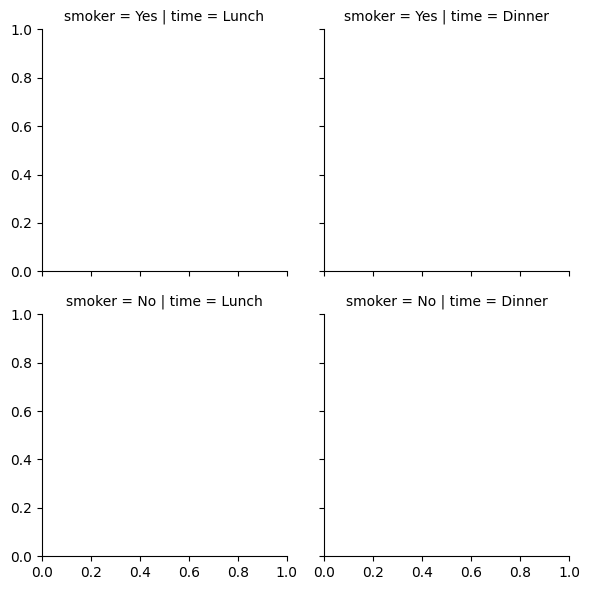

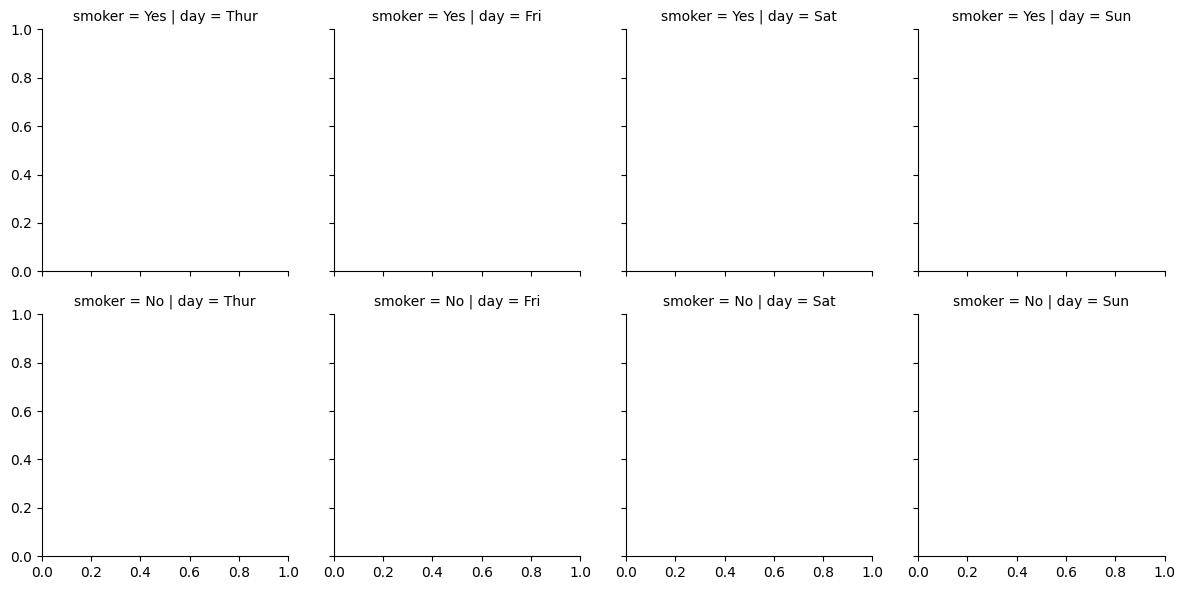

In [33]:
# FacetGrid()

# how many unique values we have in say, time and smoker column
tips_data['day'].nunique(),tips_data['time'].nunique(),tips_data['smoker'].nunique()

# we have 4 unique days, 2 unique times, and 2 uniques smoker value
# Then we initialize an empty grid for col = 'time', row = 'smoker'
first_grid = sns.FacetGrid(tips_data, col='time', row = 'smoker') # 2 cols (2 days), 2 rows(2 values)
sec_grid = sns.FacetGrid(tips_data, col='day', row = 'smoker') # 4 cols, 2 rows

Main approch for visualizating data on the above grid is using FacetGrid.map()
Looking at variable distirbution (total_bill) by using a histogram



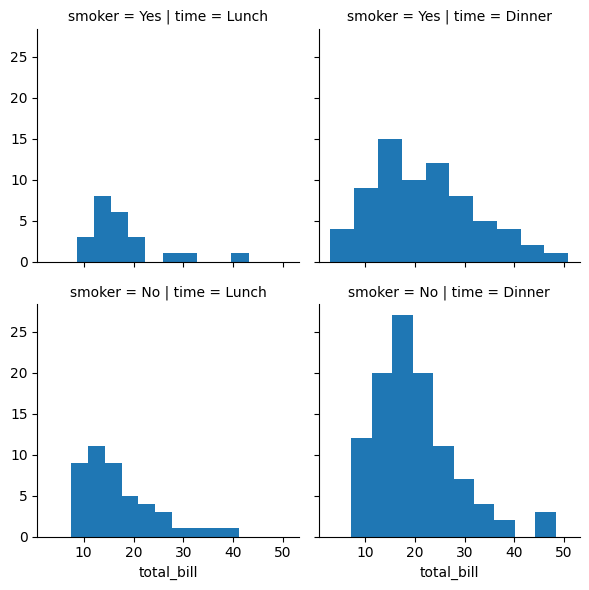

In [34]:
time_smoker_grid = sns.FacetGrid(data  = tips_data, col = 'time', row = 'smoker') # here we pass col names and dataframe, instead of number
time_smoker_grid = time_smoker_grid.map(plt.hist, 'total_bill')

Here we map a plot type (histogram) for variable (total_bill) and separate the result based on variables/column (time) and another varibale/row (smoker).

the x_axis is our total_bill, subplots are labeled yes/no for smoker, lunch/dinner for time

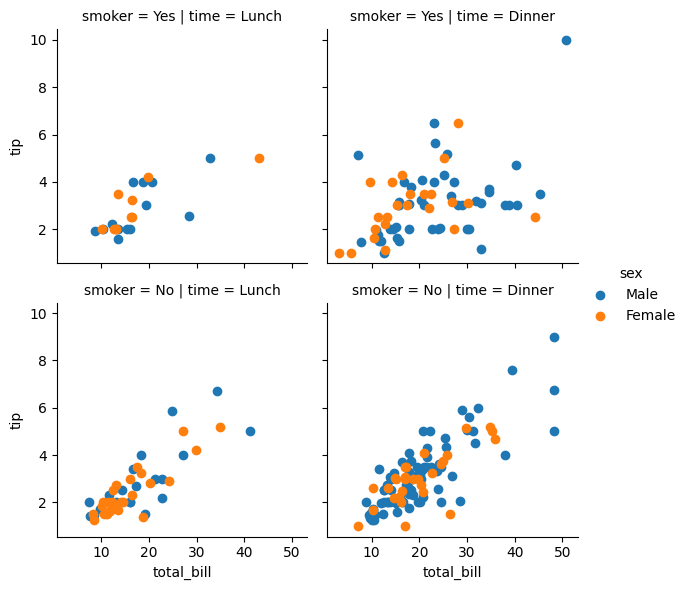

In [35]:
# Scatter plot for FacetGrid(), here we passing 'hue', because scatter plot takes more than one argument, and display legend

time_smoker_sex_grid = sns.FacetGrid(tips_data, col= 'time', row='smoker', hue='sex')
time_smoker_sex_grid = time_smoker_sex_grid.map(plt.scatter, 'total_bill', 'tip').add_legend() # for scatter plot add y and x

To show the third variable (sex), we add arguement 'hue' in scatter plot, with two colors for male and female. 

It shows the distribution of vairbales and makes comparision.


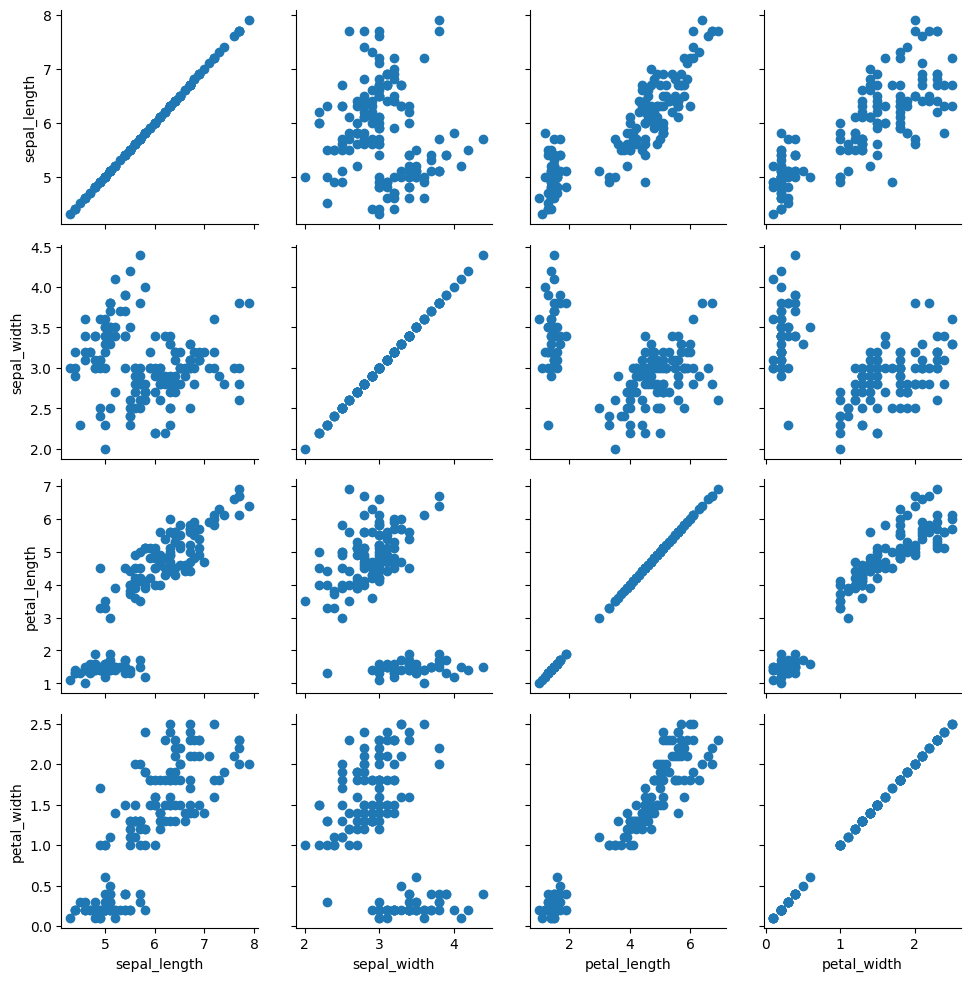

In [36]:
# PairGrid()
# show the head of iris
iris_data.head()

# Make an empty PairGrid()
iris_pair = sns.PairGrid(iris_data) # a matirx of variable

# Map scatter plot to pairgrid
iris_pair.map(plt.scatter)

Control plot
- map_diag(): specify what to plot along the diagonal using
- map_offdiag(): what on the other part 
- use different function in the upper and lower triangles to emphasize different aspects of the relationship

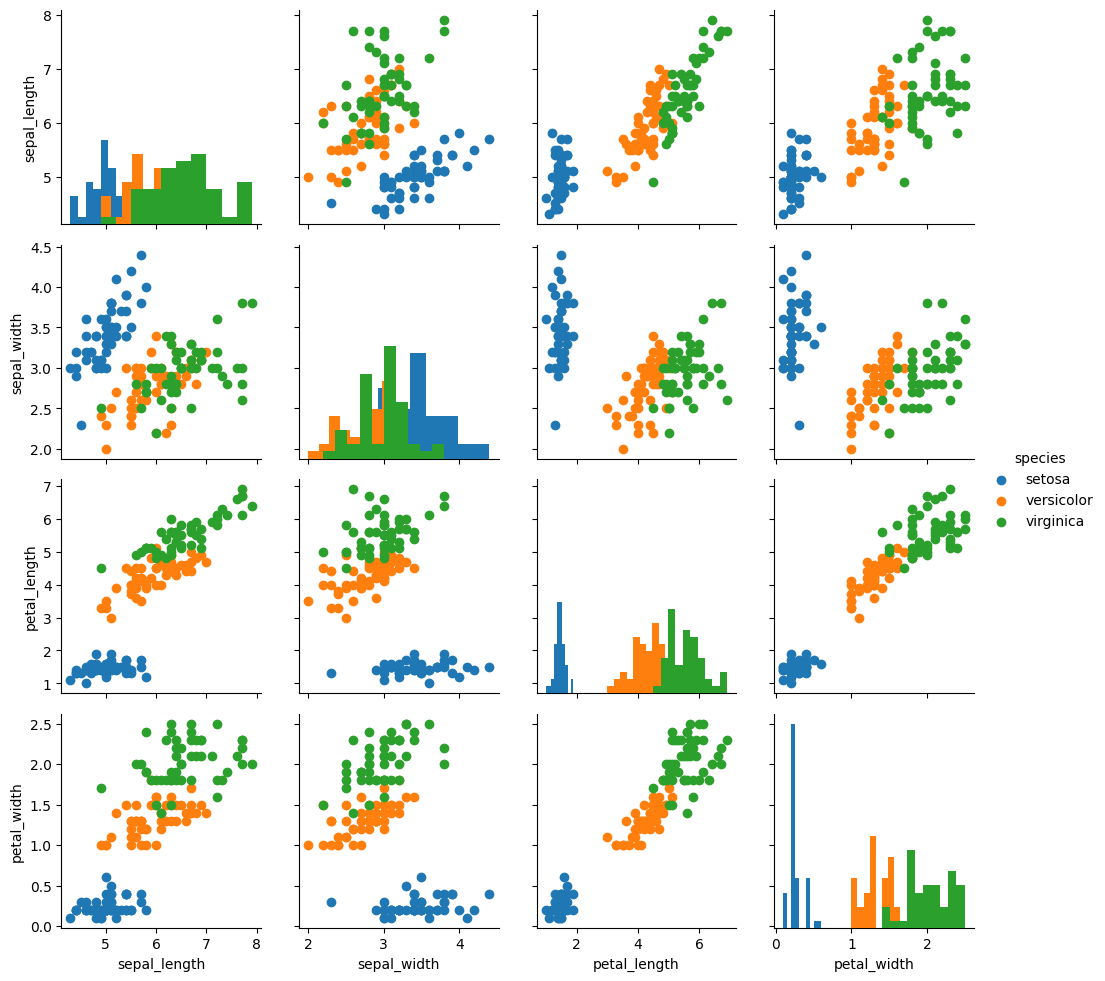

In [37]:
# First make an empty gird
iris_grid = sns.PairGrid(iris_data, hue='species') # the values of species are represented by 'hue'

# histogram plot anlog the diagonal
iris_grid.map_diag(plt.hist)

# scatter plot off the diagonal
iris_grid.map_offdiag(plt.scatter)

# add legend
iris_grid.add_legend();

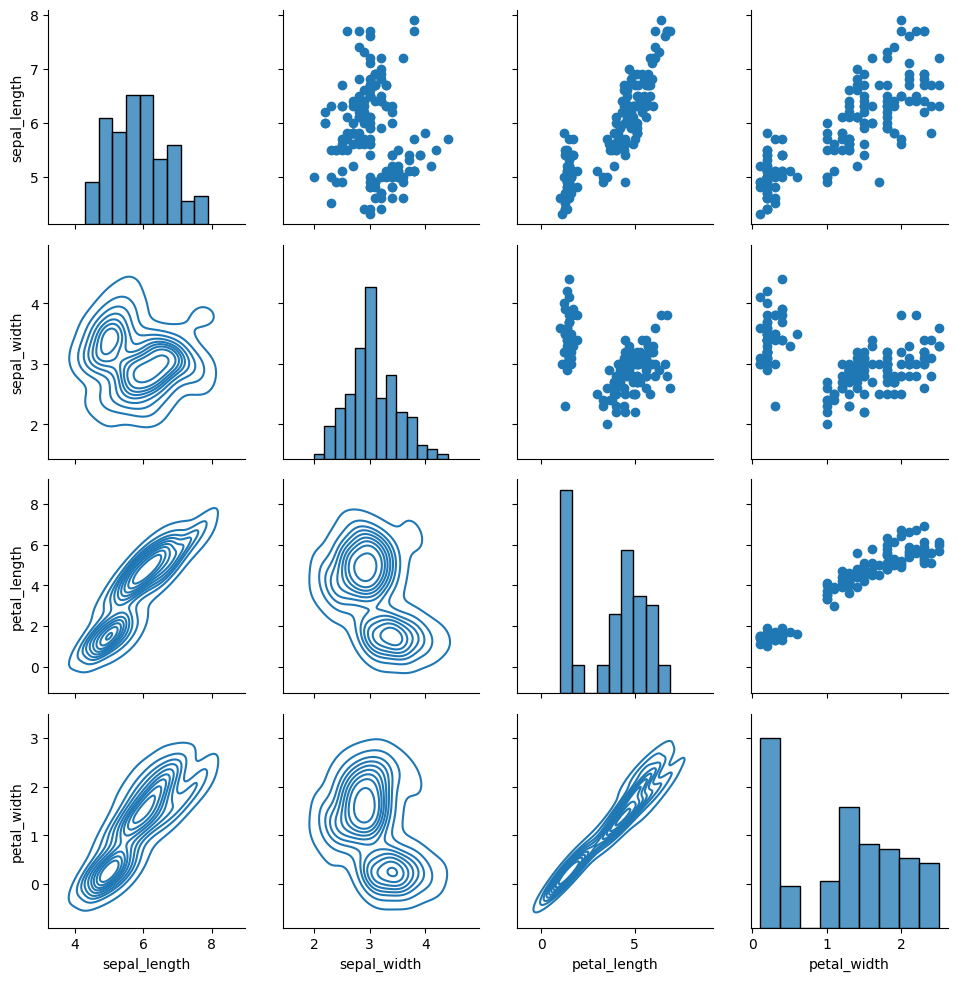

In [38]:
# More control on the pairgrid by having different types of plots on the same grid

# initialize the gird
iris_grid_init = sns.PairGrid(iris_data)

# Alog the diagonal
#iris_grid_init.map_diag(sns.distplot) 
# `distplot` is a deprecated function instead we use the 'histplot'
iris_grid_init.map_diag(sns.histplot)

# On the upper section
iris_grid_init.map_upper(plt.scatter)

# On the lower section

iris_grid_init.map_lower(sns.kdeplot)

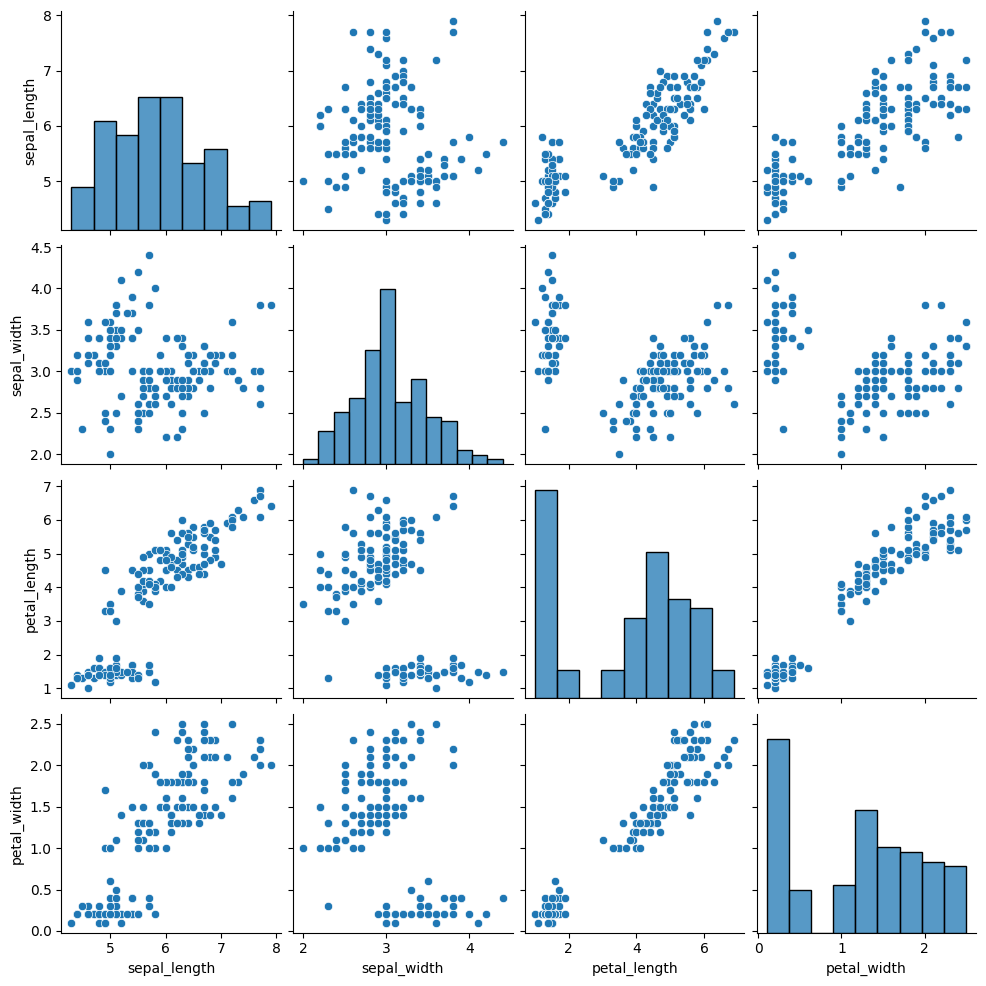

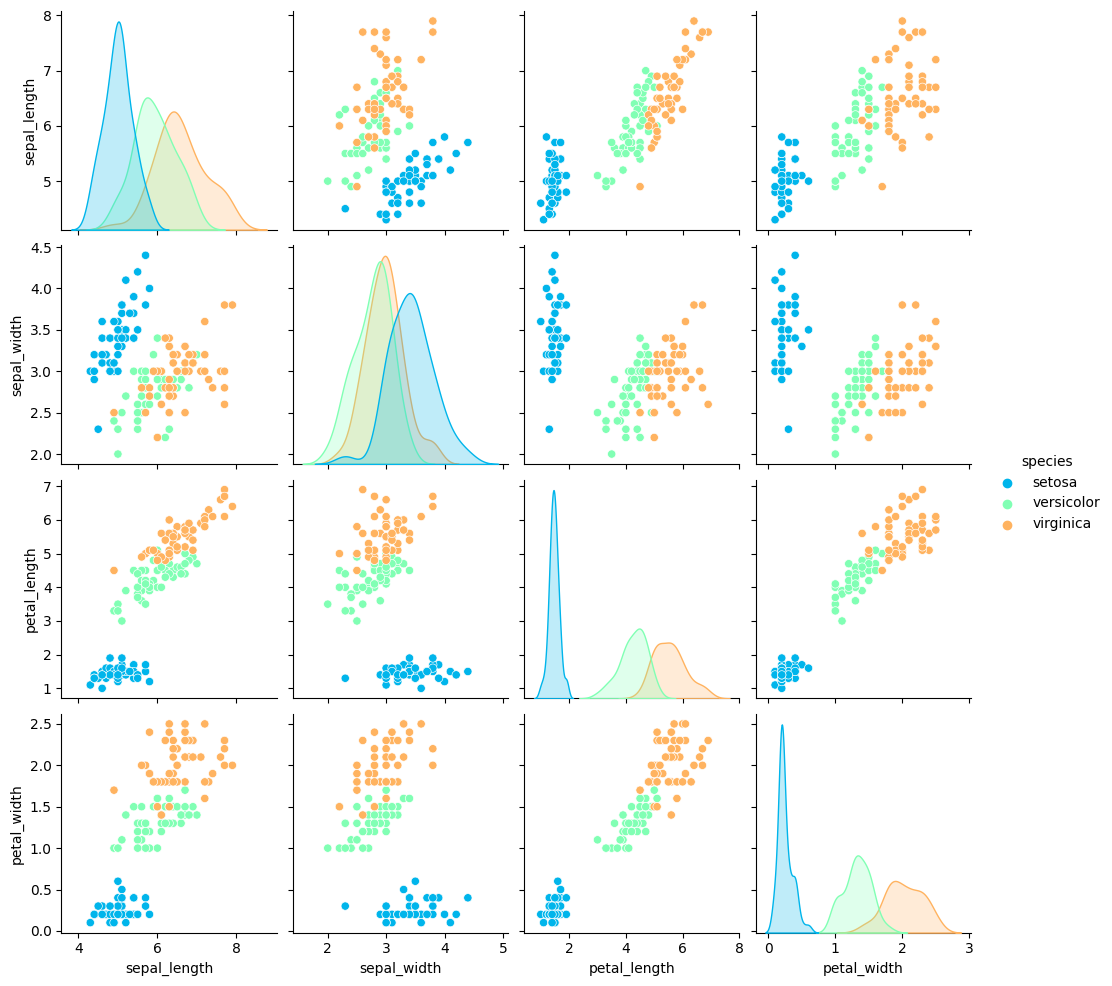

In [39]:
# pairplot()
sns.pairplot(iris_data)

# how many species
iris_data['species'].unique() # 3

# pass the species to 'hue'
sns.pairplot(iris_data, hue='species', palette = 'rainbow')

# we 'hue' we have more information to make comparision

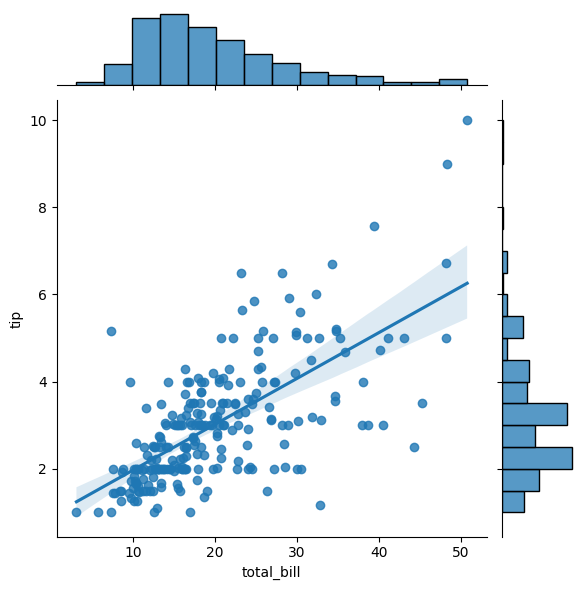

In [40]:
# JointGrid()
# First initialize the grid
tips_jointGrid = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips_data)
tips_jointGrid = tips_jointGrid.plot(sns.regplot, sns.histplot)

### Matrix Plots

- heatmap(), plot the data as color-encoded matrices
plot rectangular data as a color-encoded matrix

primary way of showing matrix plot.

our data should already be in a matrix form

The matrix form of the data mean the index name and the column name match up so that the cell
value actually indicates something that is relevant to both of those names

The row is not actually the variable. In order to get it into a variable form, we need to have both variables on the columns and rows.  Do it through a pivot table, or try to get correlation data 

using correlation: (tips.corr() we get a matrix form of our data with correlation between the columns and indexes.)

Then to call heatmap() on our correlated data

sns.heatmap function basically just colors it

change the cmap cmap='coolwarm'.

annot=True write the data value in each cell 

using pivot table, pivot_table(values, index, columns)

cmap = ‘magma’ – using different color map of our choice linecoler = ‘white’- to add line between each cell
linewidth = 1 - how thik the line should be

- clustermap(), indicate clusters within the data
uses hierarchal clustering to produce a clustered version of the heatmap where similar groups are close to each other

In [41]:
# importing libraries
# import seaborn as sns
# %matplotlib inline

# to avoid warning
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Flights dataset, tells the no. of passengers flew in a month of some year
flights_data = sns.load_dataset('flights')
tips_data.head()
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: >

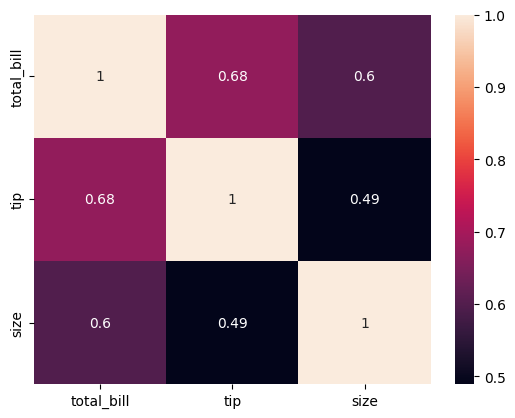

In [43]:
# Heatmap()

# try the correlation data
tips_data.head()
tips_corr = tips_data.corr()

sns.heatmap(tips_corr, annot =True)
#sns.heatmap(tips_corr, cmap ='coolwarm', annot =True)

# less corr, more ind

<Axes: xlabel='year', ylabel='month'>

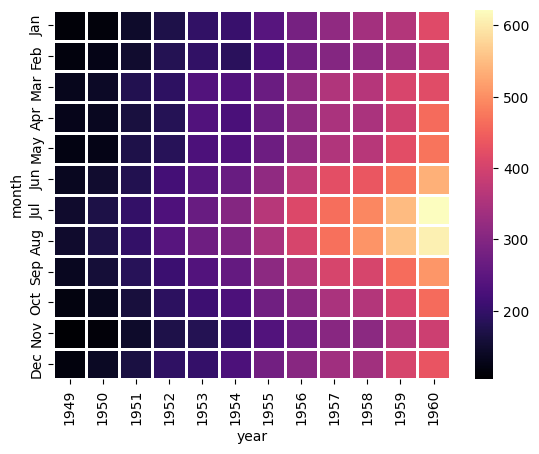

In [44]:
# flight data, pivot table
flight_pivot = flights_data.pivot_table(values = 'passengers', index = 'month', columns = 'year')

# pass to heatmap()
#sns.heatmap(flight_pivot)
sns.heatmap(flight_pivot,cmap = 'magma', linecolor = 'white', linewidths = 1)

# Annotate each cell with the numeric value using integer formatting:
#sns.heatmap(flight_pivot, cmap='magma', linecolor='white',linewidths=1, annot=True, fmt="d")


From above we see that the overall no of passengers increases as we move from 1949 to 1960.

This make sense because more people used airplanes with time and more flights were available.

We can also observe that the popular months for travel are usually summer months, Jule, July and August!

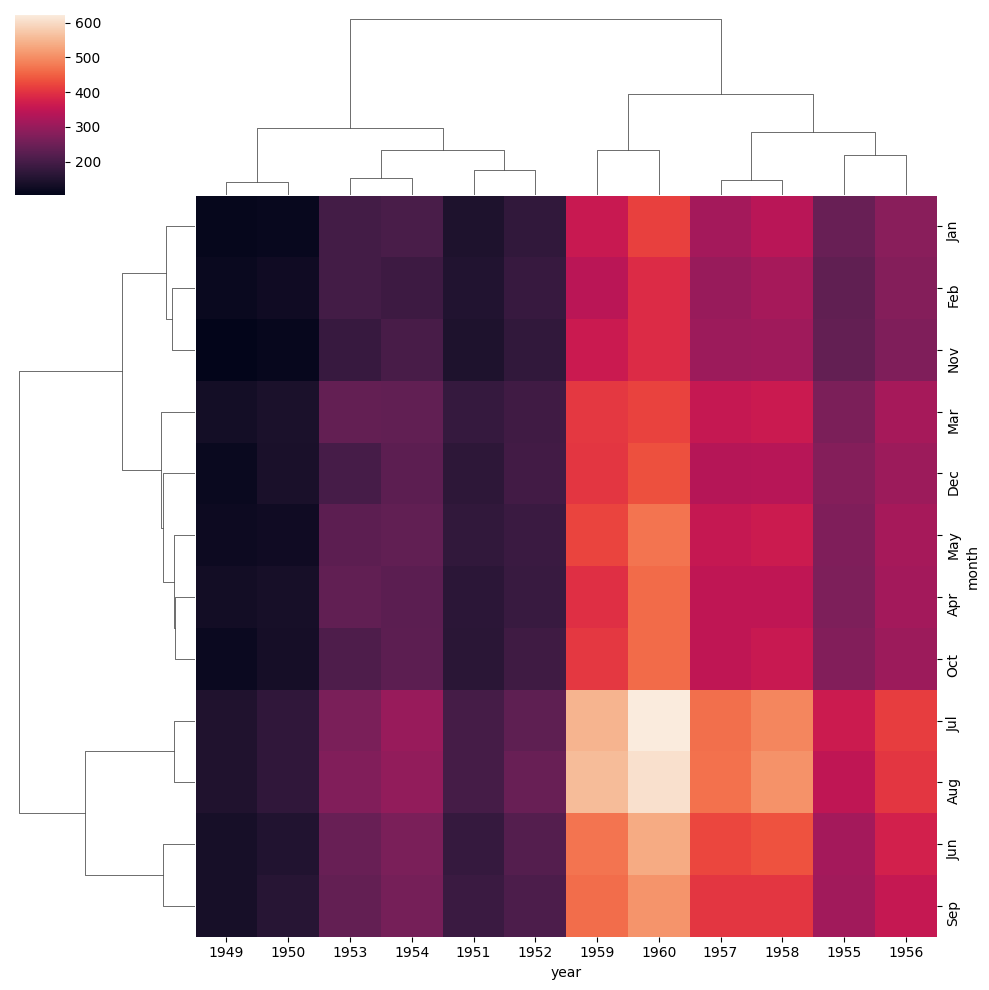

In [45]:
# clustermap()
flight_cluster = sns.clustermap(flight_pivot)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count)

we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months). 1959 and 1960 are similar and put besides each other

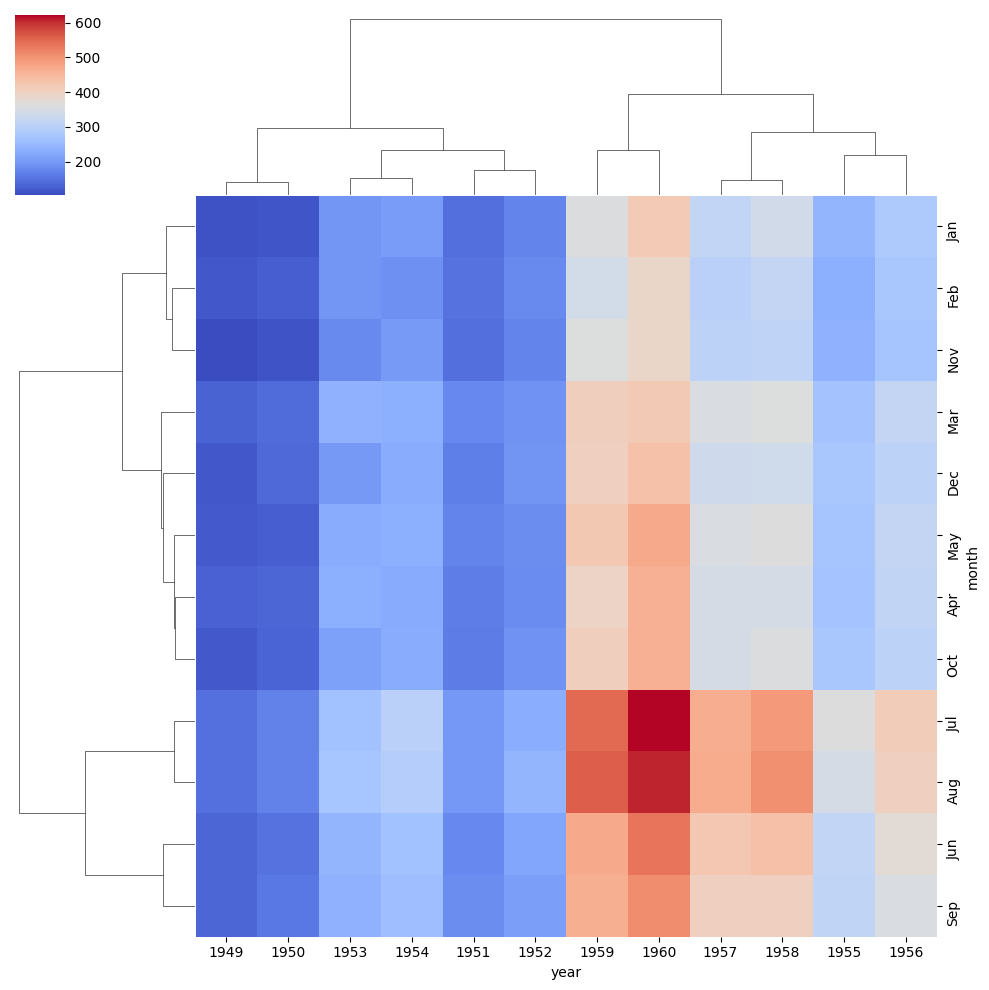

In [46]:
# More options to get the information a little clearer like normalization, cmap is your friend!
sns.clustermap(flight_pivot, cmap='coolwarm')

The clusters are much clearer but we can still see the passengers in the bar from 0 to 600. 

We can standardize the scale using standard_scale=1

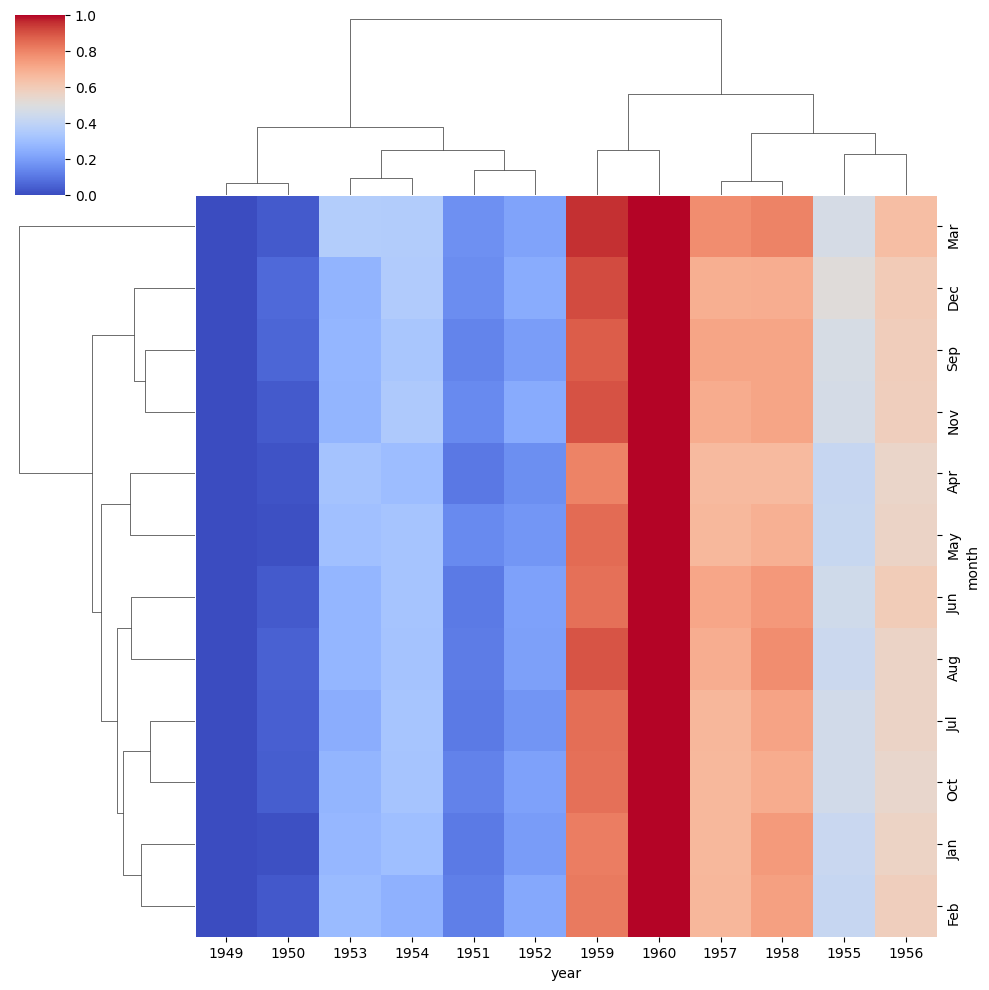

In [47]:
sns.clustermap(flight_pivot, cmap='coolwarm',standard_scale=0.05) # standard_scale =1

Based on the normalized scale, we get much better understanding of our data. We see that the winter months November, January and February are always low passenger months while the summer months with red color are all the time high sale or more passenger months!

### Regression Plots

emphasize patterns in a dataset during exploratory data
analyses

- lmplot(), display linear models with seaborn.
The method, plots data and regression model fits across a FacetGrid.

combines regplot() and FacetGrid.

- regplot() vs lmplot()

lmplot() uses regplot() internally and takes most of its parameters.

lmplot() is a figure-level function and creates its own figure, which is managed through a FacetGrid.

In [48]:
# import libraries
#import seaborn as sns
#%matplotlib inline

tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


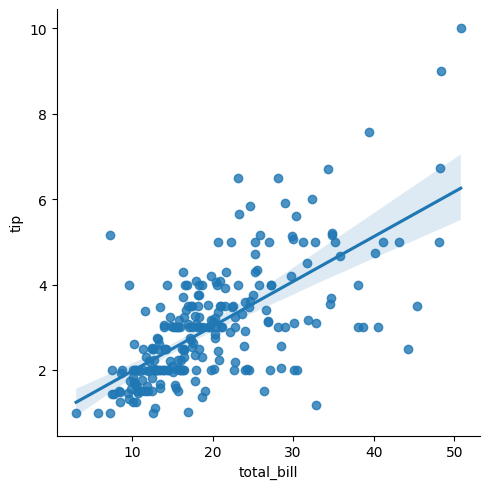

In [49]:
#lmplot()
sns.lmplot(x = 'total_bill', y = 'tip', data = tips_data)

Here, we basically have a scatter plot with linear fit on top of it

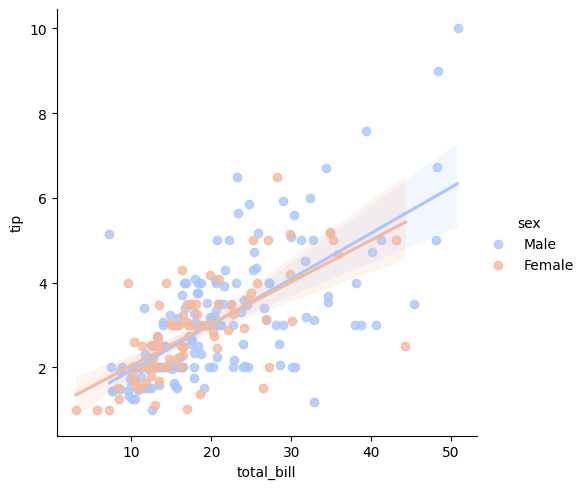

In [50]:
# passing 'sex' as 'hue'
sns.lmplot(x = 'total_bill', y = 'tip', data = tips_data, hue ='sex', palette='coolwarm')

hue = sex conveniently split up the plots, as well as color the hue based on the categorical features. 

we have two scatter plots and tow linear fits with different color on top of each other. 

We observe that, as far as total_bill vs tip are concerned, the male and female have similar linear fit on the data!

pass the matplotlib style parameters. 
https://matplotlib.org/stable/api/markers_api.html

For example, let’s pass the list of markers for male and
female. Its good to know and don’t worry about remembering these parameters. You may not use them often and if
needed, you can always check the reference notebook or consult the official website of matplotlib and seborn.

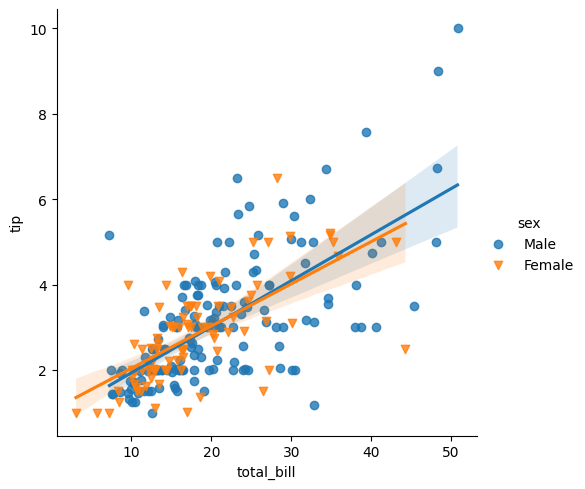

In [51]:
# passing the list of markers
sns.lmplot(x = 'total_bill',y = 'tip',data = tips_data,hue = 'sex', markers = ['o','v']) 

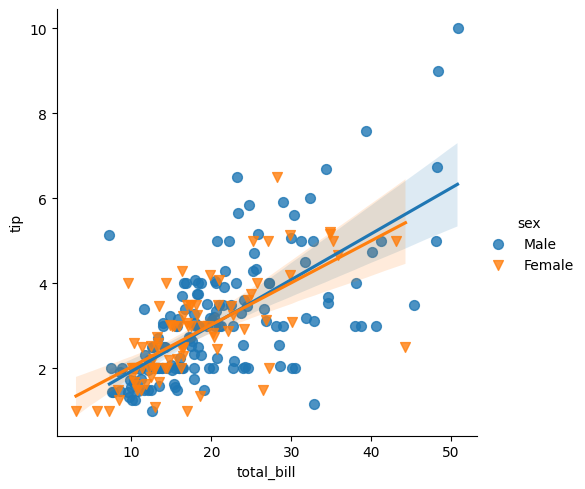

In [52]:
# Changing the marker size -- passing the dict here to scatter_kws
sns.lmplot(x = 'total_bill',y = 'tip',data = tips_data, hue = 'sex',
markers = ['o','v'], scatter_kws = {'s':50}) # 's':100

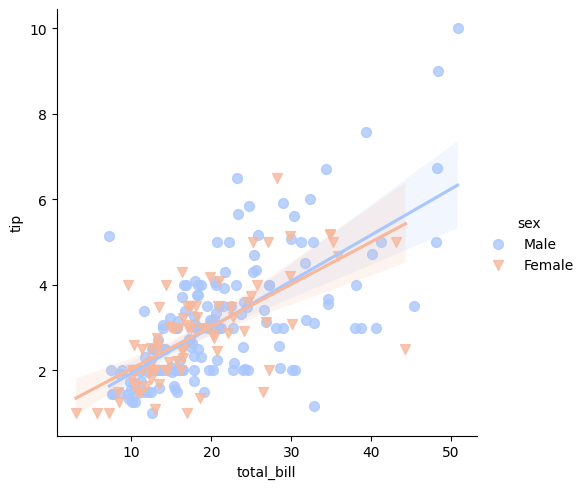

In [53]:
# different pelette = coolwarm
sns.lmplot(x = 'total_bill',y = 'tip', data = tips_data, hue = 'sex',
markers = ['o','v'], scatter_kws = {'s':50}, palette = 'coolwarm') #'s':100

With Grid, 

We can add more variable separation through columns and rows with the use of a grid using the col or row arguments in lmplot()

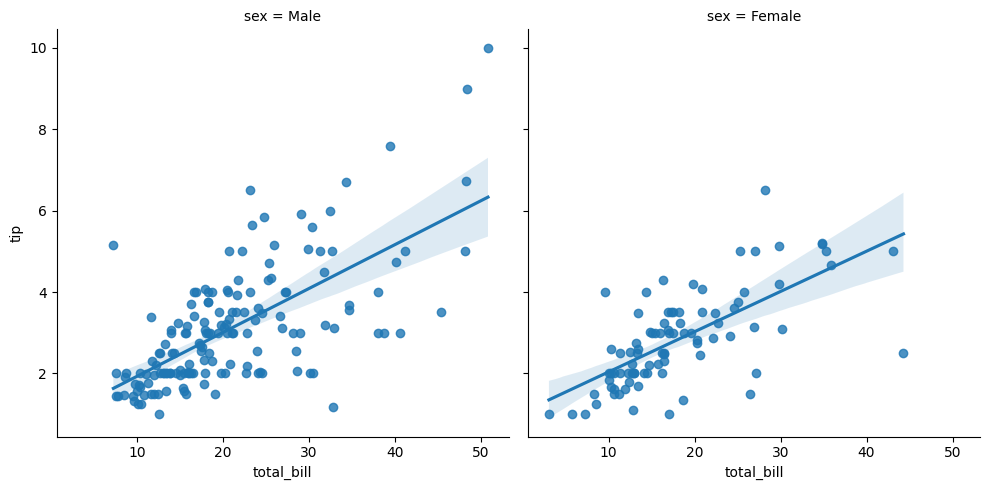

In [54]:
# let's set sex as col.
sns.lmplot(x = 'total_bill',y = 'tip',data = tips_data, col ='sex')

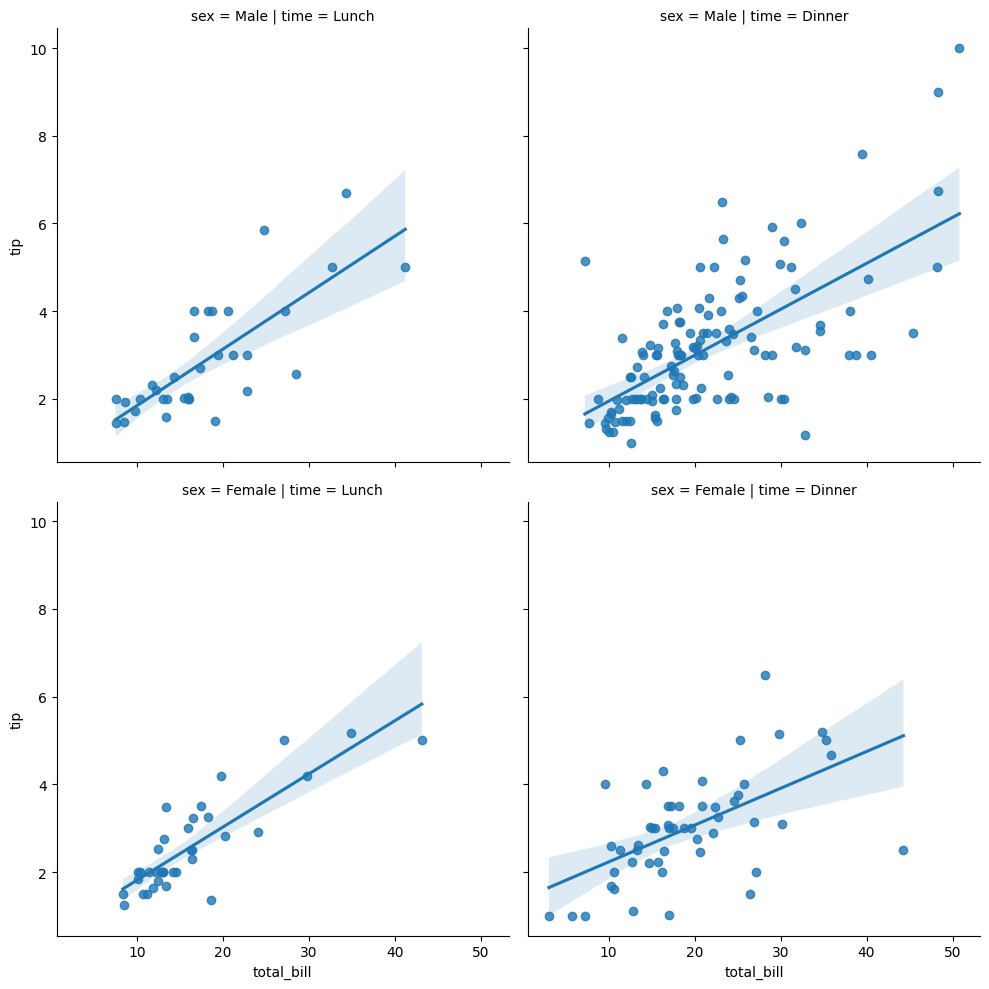

In [55]:
# let's set sex as col. and time as row!
sns.lmplot(x = "total_bill",y = "tip", data = tips_data, row = "sex", col = "time")

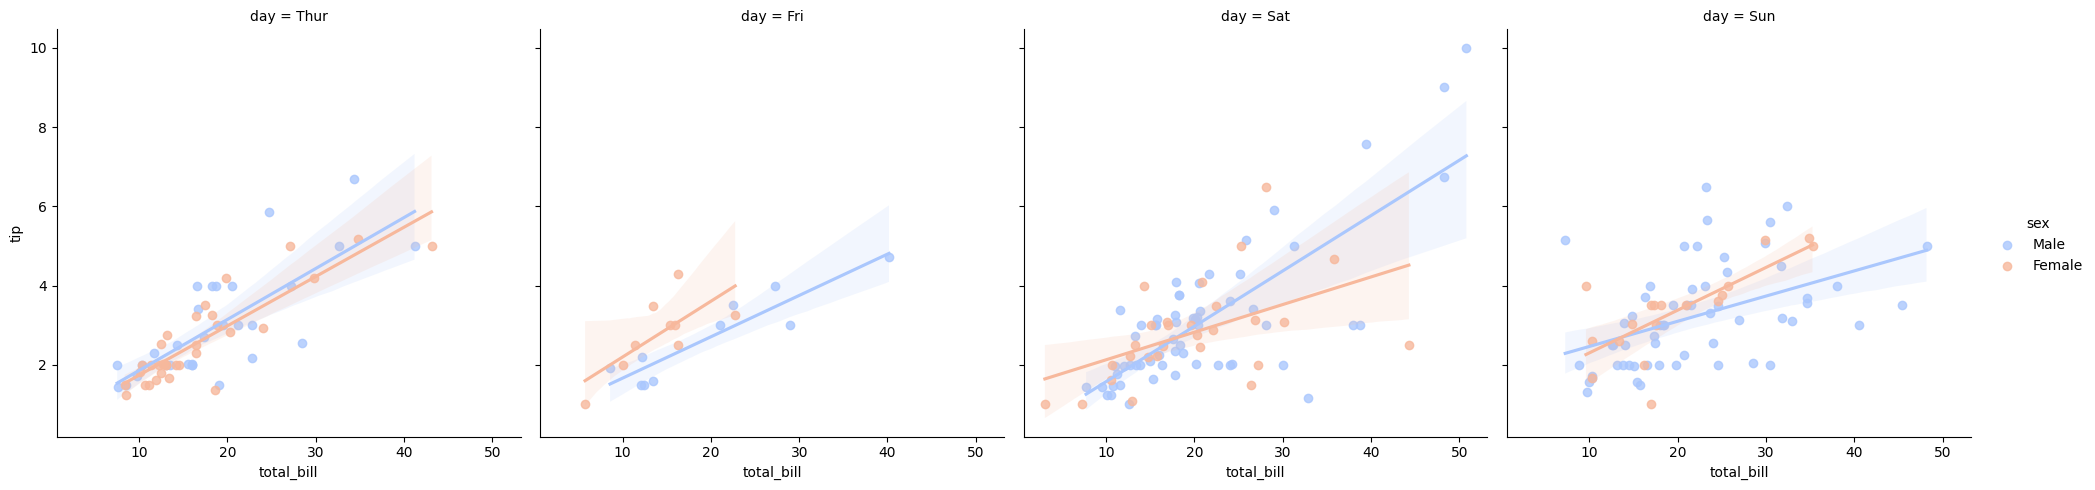

In [56]:
# col, row and hue together!
sns.lmplot(x = 'total_bill',y = 'tip',data = tips_data,
col = 'day', hue = 'sex', palette = 'coolwarm')

Aspect ratio and Size

Seaborn figures can have their size and aspect ratio adjusted with the size and aspect parameters

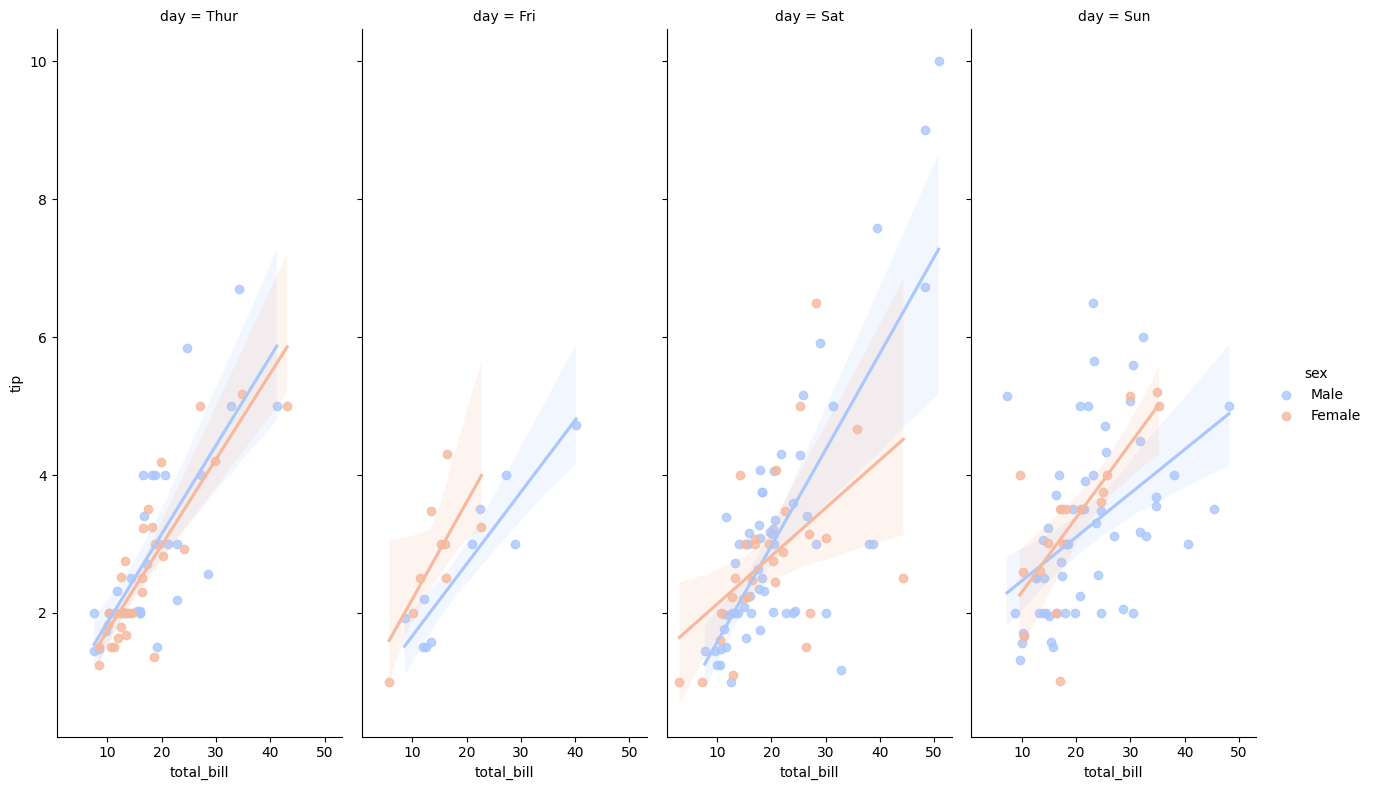

In [57]:
sns.lmplot(x='total_bill',y='tip',data=tips_data, col='day',
hue='sex', palette='coolwarm', aspect=0.4, height=8) 
# height was size in previous versions


# To do: Adjust the text size!

jitter parameter with size along “x” and tip along “y”. Tips actually overlap without jitter (try yourself) and using jitter allows to make the distribution more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself.

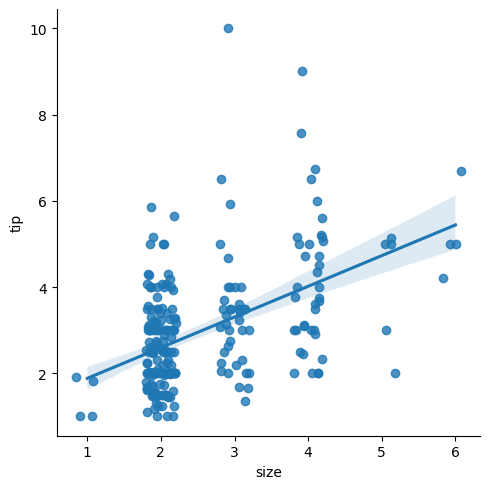

In [58]:
 sns.lmplot(x="size", y="tip", data=tips_data, x_jitter=0.2);

Rather than jitter, another option is to collapse the observations in each discrete bin to plot an estimate
of central tendency along with a confidence interval. We can compute mean using numpy and pass in to parameter x_estimator in lmplot.


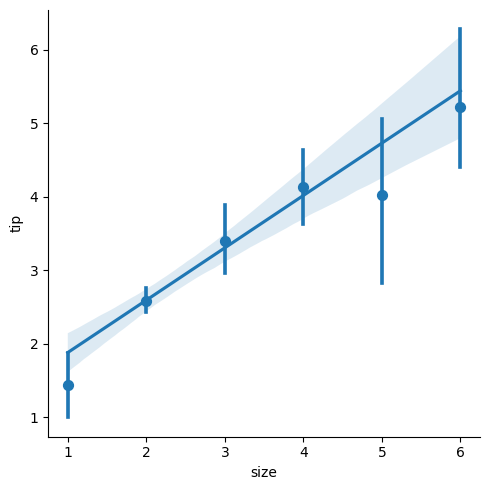

In [59]:
import numpy as np
sns.lmplot(x="size", y="tip", data=tips_data, x_estimator=np.mean);

Let’s learn another way of getting data in-sight. What if our “y” variable is binary, and we want to separate them with some boundary!. A simple linear regression also “works” but does not provide convincing predictions. Anyhow, let’s create a new column in our dataframe by dividing tips into tow classes, False/True based on some condition in this case!

In [60]:
tips_data["big_tip"] = (tips_data.tip / tips_data.total_bill) > 0.15
# try number other then 0.15 and see how the plots change!

In [61]:
# jsut have a quick look on our dataframe with new column!
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


So, we have a new column big_tip with True/False! Now, it’s good idea to plot “total_bill” against “big_tip”. 

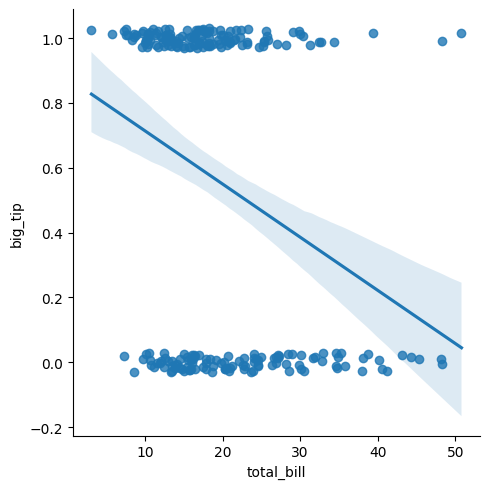

In [62]:
sns.lmplot(x="total_bill", y="big_tip", data=tips_data, y_jitter=.03);

Notice that a linear regression line is separating the two classes in this case, however, this is not an
appropriate way. The solution in this case is to fit a logistic regression, such that the regression line
shows the estimated probability of y = 1 for a given value of x. We can do this using logistic = True
parameter in lmplot!. Please note, we are going to learn linear and logistic regression in details in our Machine
Learning section, just consider these terms for some plotting purpose at this stage. Another important thing to
note, you need to install statmodels library to get the plot below!

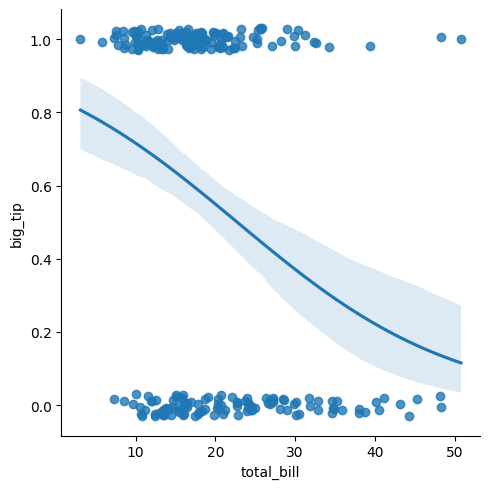

In [63]:
sns.lmplot(x="total_bill", y="big_tip", data=tips_data, logistic=True, y_jitter=.03);
#'statsmodels' needs to be installed for this plot, otherwise you may get an error!

This was all about the regression plots at the moment. It is recommended to revise what you have
learned so far. Practice your skills using other datasets and learn by doing

### Controlling figure aesthetics in seaborn

Its time to talk about one of the most important aspect in the data presentation, report writing and
storytelling, which is figure aesthetics. This very important aspect if widely ignored by the early
stage data scientist which could significantly reduce the impact of all your efforts at the end. Always
pay attention to figure aesthetics!

In [64]:
# import libraries
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn figure styles

- set_style(), 

We can set particular styles using set_style(). <shift+tab> for doc string You can try different
seaborn’s themes: darkgrid, whitegrid, dark, white, and/or ticks. They are each suited to different applications and personal preferences

<Axes: xlabel='sex', ylabel='count'>

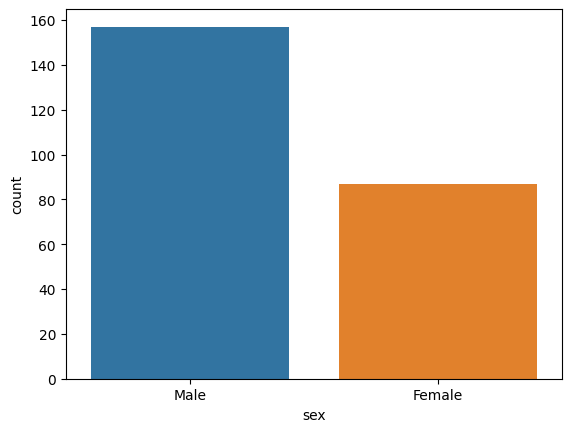

In [65]:
# Let's get a countplot
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

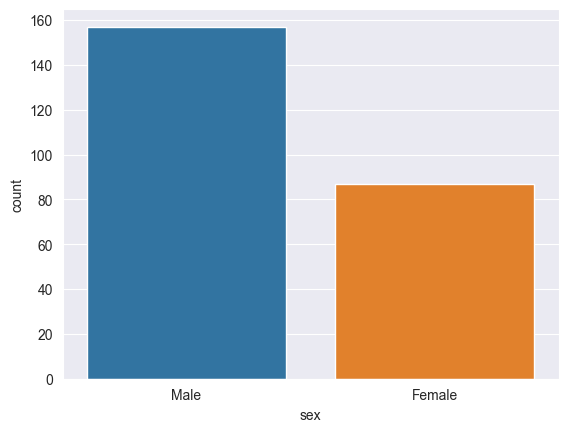

In [66]:
# setting background to different theme
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

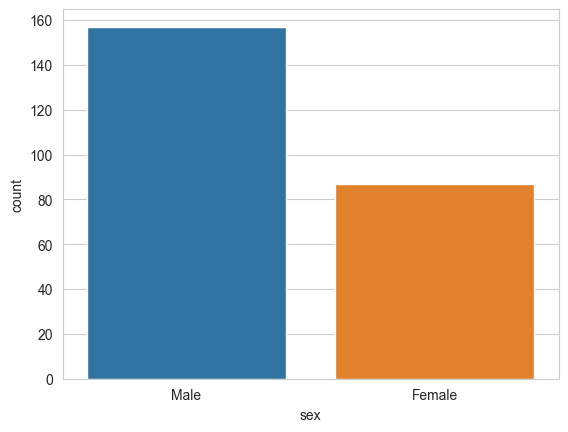

In [67]:
# Passing whitegrid will add the ticks on the plot
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)# To do: Try palette='deep' and see the difference!

Removing axes spines

- despine(), We can remove spine using despine() method. By default: top=True, right=True, left=False, bottom=False

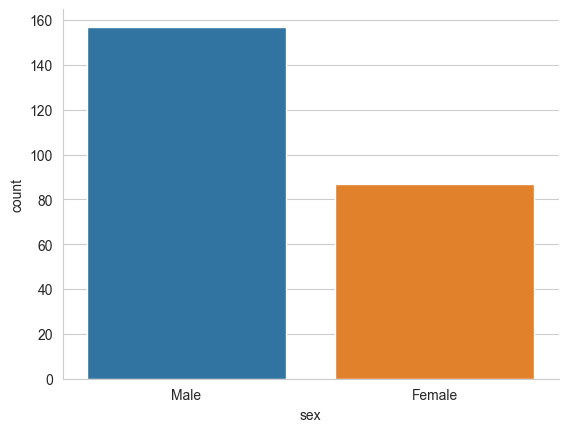

In [68]:
sns.countplot(x='sex',data=tips)
sns.despine() # top and right is True by default

Figure size and Aspect

We can simply use matplotlib’s plt.figure(figsize=(width,height) to change the size of most of
the seaborn’s plots

We can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and
aspect. For example:
Good to know: In the 2nd line of the code below, when seaborn calls matplotlib, it actually set the figure
size to the given size for seaborn. So, we can actually use our matplotlib knowledge in combination with
seaborn to set the figure size and aspect ratio



<Axes: xlabel='sex', ylabel='count'>

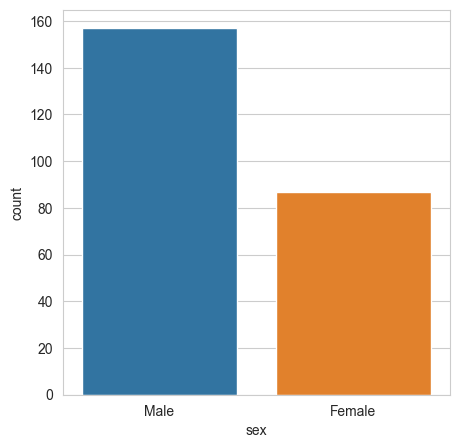

In [69]:
plt.figure(figsize=(5,5)) # setting figure size
sns.countplot(x='sex',data=tips) # getting count plot for the data

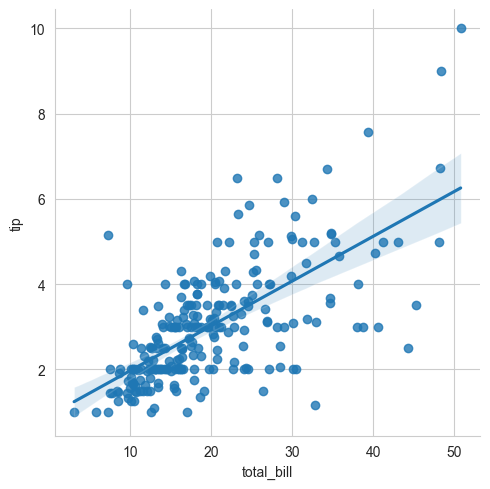

In [70]:
# Another example with grid type plot
sns.lmplot(x='total_bill',y='tip',data=tips,height=5,aspect=1) 
# height was size in the older versions!

Scaling plot elements

- set_context(), The set_context() allows us to override default parameters: Parameter context : dict, None, or one
of {paper, notebook, talk, poster}, the style of your presentation!



<Axes: xlabel='sex', ylabel='count'>

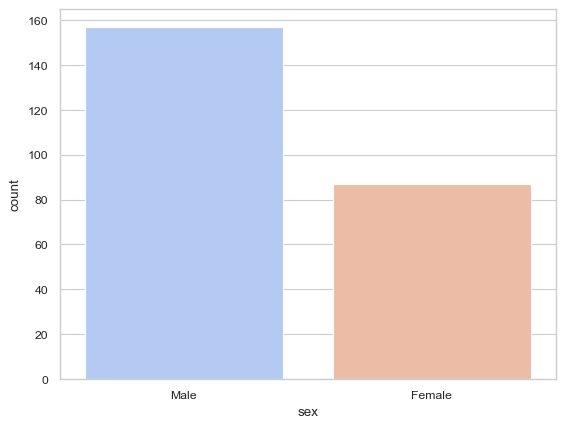

In [71]:
sns.set_context('paper',font_scale=1)
sns.countplot(x='sex',data=tips, palette='coolwarm')

For more
palette options, explore matplotlib color maps

https://matplotlib.org/examples/color/colormaps_reference.html